In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

import GeoDS
from GeoDS import hypercube

import mlflow

In [4]:
trial_name = 'Mosaic_Minerals_3D'

output_folder = os.path.join(trial_name, 'out_folder/')
CatBoost_predictions_folder = os.path.join(trial_name, 'CatBoost/')
RF_predictions_folder = os.path.join(trial_name, 'Random_Forest/')
LGBM_predictions_folder = os.path.join(trial_name, 'LGBM/')

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
if not os.path.exists(CatBoost_predictions_folder):
    os.makedirs(CatBoost_predictions_folder)
    
if not os.path.exists(RF_predictions_folder):
    os.makedirs(RF_predictions_folder)
    
if not os.path.exists(LGBM_predictions_folder):
    os.makedirs(LGBM_predictions_folder)

In [5]:
random_state = 42

In [6]:
#df = pd.read_csv("Mosaic_Minerals_3D/outputs/moving_window_stats_win_size_3.csv")
#df.head()

In [7]:
#df_target = pd.read_csv("MM_Gaboury_MAGINV_finescale12-5m_with_target.csv")
#df_target.head()

In [8]:
#df = df.merge(df_target, how='left', on=['X', 'Y', 'Z', 'susc'])
#df.head()

In [9]:
#df.shape

In [10]:
#df_target.shape

In [11]:
#np.unique(df.Target, return_counts=True)

In [12]:
#indices = df[df.Target == -999].index

In [13]:
#df_1000 = df.loc[df.index.isin(indices),'Target'].sample(n=1000, random_state=42)

In [14]:
#df_1000.index

In [15]:
#df.loc[df.index.isin(df_1000.index),'Target'] = 0.
#np.unique(df.Target, return_counts=True)

In [16]:
#indices_999 = df[df.Target == -999].index
#df.loc[df.index.isin(indices_999),'Target'] = np.nan
#np.unique(df.Target, return_counts=True)

In [17]:
#df.head()

In [18]:
#df.to_csv("Mosaic_Minerals_3Dcube.csv", index=False)

In [19]:
df = pd.read_csv("Mosaic_Minerals_3Dcube.csv")
df.head()

,X,Y,Z,susc,susc_mean,susc_max,susc_min,susc_var,susc_std,susc_sum,Target
0,639237.5,5241300.0,-687.5,-0.025675,-0.025685,-0.024940,-0.026458,1.883322e-07,0.000434,-0.693494,NaN
1,639237.5,5241300.0,-675.0,-0.025183,-0.025186,-0.024451,-0.025965,1.923625e-07,0.000439,-0.680015,NaN
2,639237.5,5241300.0,-662.5,-0.024682,-0.024703,-0.024028,-0.025456,1.684316e-07,0.000410,-0.666978,NaN
3,639237.5,5241300.0,-650.0,-0.024251,-0.024250,-0.023617,-0.024917,1.385795e-07,0.000372,-0.654756,NaN
4,639237.5,5241300.0,-637.5,-0.023847,-0.023830,-0.023221,-0.024485,1.295948e-07,0.000360,-0.643422,NaN


In [20]:
df["susc_var"].min()

2.8165439148936307e-11

In [21]:
df["susc_std"].min()

5.307112128920616e-06

In [22]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001543 entries, 0 to 30001542
Data columns (total 11 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   X          30001543 non-null  float64
 1   Y          30001543 non-null  float64
 2   Z          30001543 non-null  float64
 3   susc       30001543 non-null  float64
 4   susc_mean  30001543 non-null  float64
 5   susc_max   30001543 non-null  float64
 6   susc_min   30001543 non-null  float64
 7   susc_var   30001543 non-null  float64
 8   susc_std   30001543 non-null  float64
 9   susc_sum   30001543 non-null  float64
 10  Target     1023 non-null      float64
dtypes: float64(11)
memory usage: 2.5 GB


In [23]:
df.columns.tolist()

['X',
 'Y',
 'Z',
 'susc',
 'susc_mean',
 'susc_max',
 'susc_min',
 'susc_var',
 'susc_std',
 'susc_sum',
 'Target']

/root/miniconda3/envs/geods37/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # This is added back by InteractiveShellApp.init_path()


array([[<AxesSubplot:title={'center':'susc'}>,
        <AxesSubplot:title={'center':'susc_mean'}>,
        <AxesSubplot:title={'center':'susc_max'}>],
       [<AxesSubplot:title={'center':'susc_min'}>,
        <AxesSubplot:title={'center':'susc_var'}>,
        <AxesSubplot:title={'center':'susc_std'}>],
       [<AxesSubplot:title={'center':'susc_sum'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

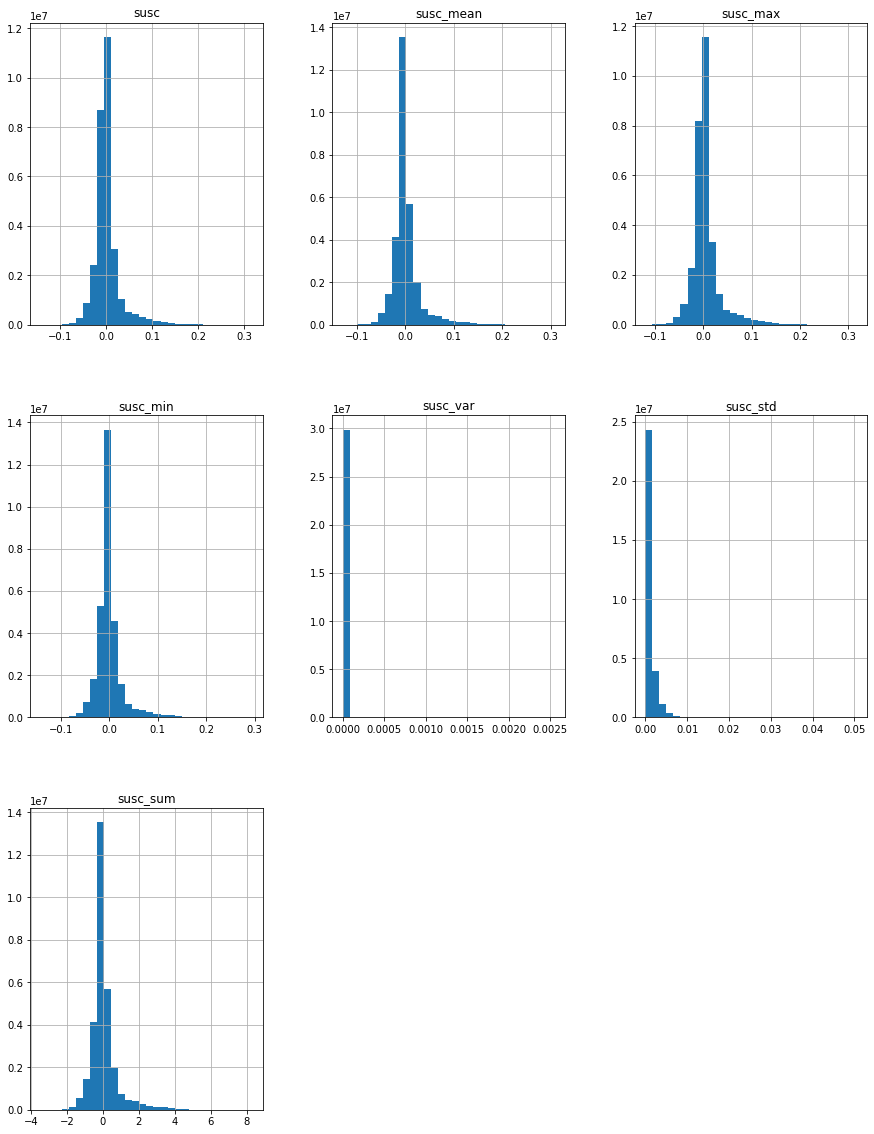

In [24]:
all_features = ['susc',
 'susc_mean',
 'susc_max',
 'susc_min',
 'susc_var',
 'susc_std',
 'susc_sum']

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[all_features].hist(ax = ax, bins=30)

In [25]:
log_features = ["susc_var", "susc_std"]

df[log_features] = np.log(df[log_features])
df.head()

,X,Y,Z,susc,susc_mean,susc_max,susc_min,susc_var,susc_std,susc_sum,Target
0,639237.5,5241300.0,-687.5,-0.025675,-0.025685,-0.024940,-0.026458,-15.485058,-7.742529,-0.693494,NaN
1,639237.5,5241300.0,-675.0,-0.025183,-0.025186,-0.024451,-0.025965,-15.463884,-7.731942,-0.680015,NaN
2,639237.5,5241300.0,-662.5,-0.024682,-0.024703,-0.024028,-0.025456,-15.596736,-7.798368,-0.666978,NaN
3,639237.5,5241300.0,-650.0,-0.024251,-0.024250,-0.023617,-0.024917,-15.791821,-7.895911,-0.654756,NaN
4,639237.5,5241300.0,-637.5,-0.023847,-0.023830,-0.023221,-0.024485,-15.858853,-7.929426,-0.643422,NaN


/root/miniconda3/envs/geods37/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'susc'}>,
        <AxesSubplot:title={'center':'susc_mean'}>,
        <AxesSubplot:title={'center':'susc_max'}>],
       [<AxesSubplot:title={'center':'susc_min'}>,
        <AxesSubplot:title={'center':'susc_var'}>,
        <AxesSubplot:title={'center':'susc_std'}>],
       [<AxesSubplot:title={'center':'susc_sum'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

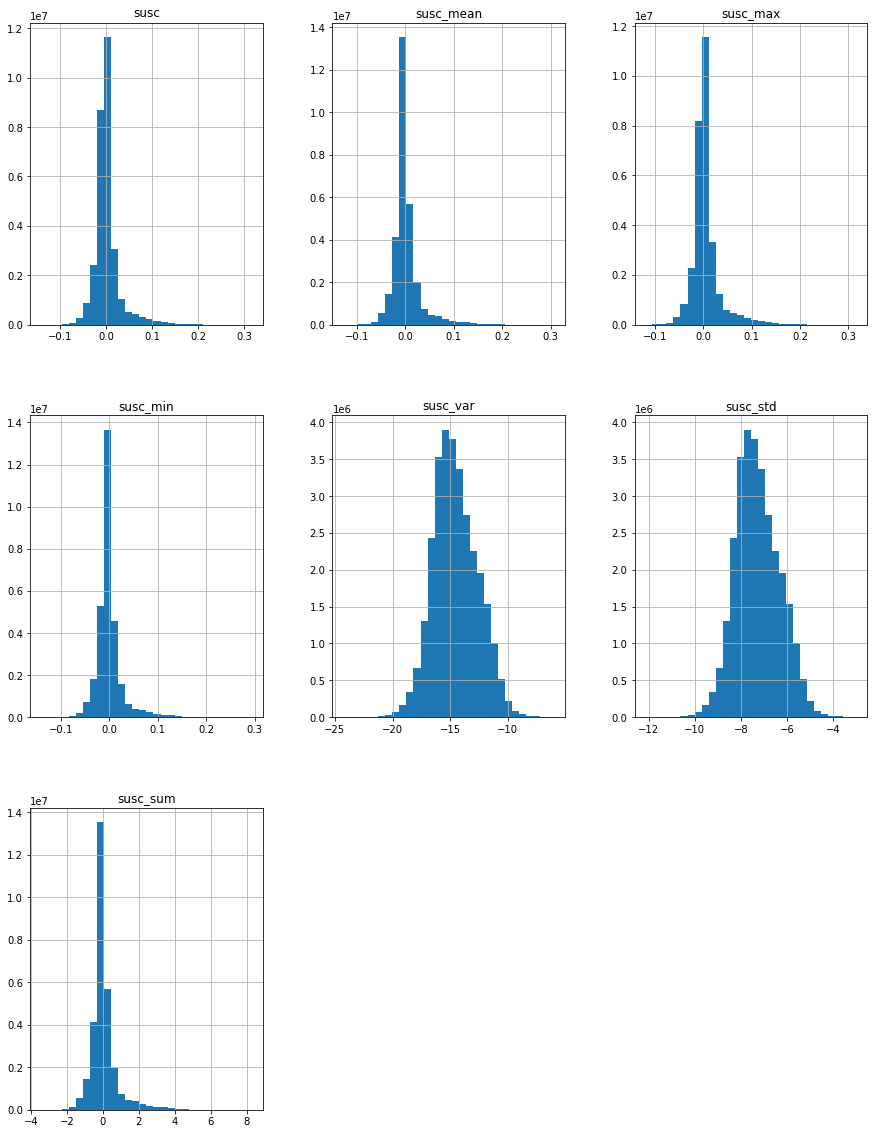

In [26]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[all_features].hist(ax = ax, bins=30)

In [27]:
columns = {
    'coordinates' : ['X', 'Y', 'Z'],
    
    'numerical' : [ 'susc',
         'susc_mean',
         'susc_max',
         'susc_min',
         'susc_var',
         'susc_std',
         'susc_sum'],
    
    'categories' : [],
    
    'target' : ['Target']
    
}

columns

{'coordinates': ['X', 'Y', 'Z'],
 'numerical': ['susc',
  'susc_mean',
  'susc_max',
  'susc_min',
  'susc_var',
  'susc_std',
  'susc_sum'],
 'categories': [],
 'target': ['Target']}

In [28]:
crs = 'epsg:26917'

cube = hypercube.HyperCube(input_data=df, crs = crs, columns_dict=columns)
cube.df.head()

,X,Y,Z,susc,susc_mean,susc_max,susc_min,susc_var,susc_std,susc_sum,Target
0,639237.5,5241300.0,-687.5,-0.025675,-0.025685,-0.024940,-0.026458,-15.485058,-7.742529,-0.693494,NaN
1,639237.5,5241300.0,-675.0,-0.025183,-0.025186,-0.024451,-0.025965,-15.463884,-7.731942,-0.680015,NaN
2,639237.5,5241300.0,-662.5,-0.024682,-0.024703,-0.024028,-0.025456,-15.596736,-7.798368,-0.666978,NaN
3,639237.5,5241300.0,-650.0,-0.024251,-0.024250,-0.023617,-0.024917,-15.791821,-7.895911,-0.654756,NaN
4,639237.5,5241300.0,-637.5,-0.023847,-0.023830,-0.023221,-0.024485,-15.858853,-7.929426,-0.643422,NaN


In [29]:
cube.show_nan_percentage()

Target's null rate :99.99659%


In [30]:
mlflow.set_tracking_uri('http://mlflow.litholens.com:8080/')
exp_id = mlflow.set_experiment("Mosaic Minerals 3D")

mlflow.start_run()

2022/09/06 13:24:53 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



<ActiveRun: >

In [31]:
mlflow.log_param("GeoDS Version", GeoDS.__version__)
mlflow.log_param("crs", crs)

In [32]:
cube.columns_dict

{'coordinates': ['X', 'Y', 'Z'],
 'numerical': ['susc',
  'susc_mean',
  'susc_max',
  'susc_min',
  'susc_var',
  'susc_std',
  'susc_sum'],
 'categories': [],
 'target': ['Target']}

In [33]:
for i in cube.columns_dict['categories']:
    cube.df[str(i)] = pd.Categorical(cube.df[str(i)])
    cube.df[str(i)] = cube.df[str(i)].apply(np.int64)

for i in cube.columns_dict['target']:
    cube.df[str(i)] = pd.Categorical(cube.df[str(i)])
    cube.df[str(i)] = cube.df[str(i)].apply(np.int64)

cube.df.dtypes

X             float64
Y             float64
Z             float64
susc          float64
susc_mean     float64
susc_max      float64
susc_min      float64
susc_var      float64
susc_std      float64
susc_sum      float64
Target       category
dtype: object

In [34]:
subsets = ['numerical', 'categories']
for subset in subsets: cube.dropna(subset=subset)

In [35]:
cube.show_nan_percentage()

Target's null rate :99.99659%


In [36]:
np.unique(cube.df[cube.columns_dict['target']], return_counts = True)

(array([ 0.,  1., nan]), array([    1000,       23, 30000520]))

In [37]:
cube.to_object(cube.columns_dict['categories'])
cube.summary()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001543 entries, 0 to 30001542
Data columns (total 11 columns):
 #   Column     Non-Null Count     Dtype   
---  ------     --------------     -----   
 0   X          30001543 non-null  float64 
 1   Y          30001543 non-null  float64 
 2   Z          30001543 non-null  float64 
 3   susc       30001543 non-null  float64 
 4   susc_mean  30001543 non-null  float64 
 5   susc_max   30001543 non-null  float64 
 6   susc_min   30001543 non-null  float64 
 7   susc_var   30001543 non-null  float64 
 8   susc_std   30001543 non-null  float64 
 9   susc_sum   30001543 non-null  float64 
 10  Target     1023 non-null      category
dtypes: category(1), float64(10)
memory usage: 2.5 GB


In [38]:
X, y = cube.getRowsWithLabelOnly(subsets=['numerical', 'categories'], target='Target')
#groups = cube.df[target_group].dropna()
#groups = cube.df[cube.df[target].notnull()][target_group]
#groups

In [39]:
all_X = cube.subset(['numerical', 'categories'])
all_X.shape

(30001543, 7)

In [40]:
X.shape

(1023, 7)

In [41]:
y.shape

(1023,)

In [42]:
np.unique(y.values, return_counts = True)

(array([0, 1], dtype=int32), array([1000,   23]))

In [43]:
# StratifiedGroupKFold
#group_kfold = StratifiedGroupKFold(n_splits=3)
#for train_index, test_index in group_kfold.split(X, y, groups):
#    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#    groups_train, groups_test = groups.iloc[train_index], groups.iloc[test_index]

# GroupKFold
#group_kfold = GroupKFold(n_splits=5)
#for train_index, test_index in group_kfold.split(X, y, groups):
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]
#    groups_train, groups_test = groups.iloc[train_index], groups.iloc[test_index]    
     
# Random Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = random_state) # stratify=y


In [44]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int32), array([598,  15]))

In [45]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int32), array([402,   8]))

In [46]:
import numpy as np
import pandas as pd
import os
import rasterio
from GeoDS import hypercube
from GeoDS.prospectivity import hyperparameterstuning
from GeoDS import utilities
from GeoDS.supervised import mapclass
from GeoDS import reporting 
from GeoDS.prospectivity import featureimportance as fe
from GeoDS import eda
from GeoDS import datawrangle
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from joblib import dump, load
import glob
from dask import dataframe as dd

import optuna
from optuna import pruners
from imblearn.pipeline import Pipeline

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

#import tensorflow as tf
#import tensorflow_data_validation as tfdv
#from tensorflow_metadata.proto.v0 import schema_pb2

#print('TFDV Version: {}'.format(tfdv.__version__))
#print('Tensorflow Version: {}'.format(tf.__version__))

plt.rcParamsDefault["figure.figsize"] = [20., 20.]
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'white'

In [114]:
n_trials = 50
numeric_cols = cube.columns_dict['numerical']
#cat_indexes = cube.GetCatFeaturesIndexes(X_train)
cat_indexes = None
#models = ['CatBoost','LGBM','SVM']
models = ['RandomForest', 'XGBoost']
#cross_validation = StratifiedGroupKFold(n_splits=5)
#cross_validation = GroupKFold(n_splits=5)
cross_validation = KFold(n_splits=5)

hyperparameterstuning.Optimizer(n_trials, models, output_folder, numeric_cols, cat_indexes, X_train, y_train,
      cv = cross_validation, groups = None, scoring='f1_macro', random_state=random_state)

[I 2022-09-03 19:38:38,547] A new study created in memory with name: RandomForest_study


{'n_estimators': 874, 'max_features': 'auto', 'max_depth': 64, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:38:41,302] Trial 0 finished with value: 0.7587553700715871 and parameters: {'n_estimators': 874, 'max_features': 'auto', 'max_depth': 64, 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.7587553700715871.


{'n_estimators': 1282, 'max_features': 'auto', 'max_depth': 98, 'min_samples_split': 9, 'min_samples_leaf': 2, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:38:44,116] Trial 1 finished with value: 0.7587553700715871 and parameters: {'n_estimators': 1282, 'max_features': 'auto', 'max_depth': 98, 'min_samples_split': 9, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 0 with value: 0.7587553700715871.


{'n_estimators': 747, 'max_features': 'auto', 'max_depth': 36, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:38:46,100] Trial 2 finished with value: 0.7587553700715871 and parameters: {'n_estimators': 747, 'max_features': 'auto', 'max_depth': 36, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.7587553700715871.


{'n_estimators': 1021, 'max_features': 'auto', 'max_depth': 56, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:38:48,494] Trial 3 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1021, 'max_features': 'auto', 'max_depth': 56, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 317, 'max_features': 'sqrt', 'max_depth': 83, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:38:49,112] Trial 4 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 317, 'max_features': 'sqrt', 'max_depth': 83, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 419, 'max_features': 'auto', 'max_depth': 92, 'min_samples_split': 4, 'min_samples_leaf': 4, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:38:49,876] Trial 5 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 419, 'max_features': 'auto', 'max_depth': 92, 'min_samples_split': 4, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1184, 'max_features': 'sqrt', 'max_depth': 80, 'min_samples_split': 10, 'min_samples_leaf': 5, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:38:51,863] Trial 6 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1184, 'max_features': 'sqrt', 'max_depth': 80, 'min_samples_split': 10, 'min_samples_leaf': 5, 'bootstrap': False}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 359, 'max_features': 'auto', 'max_depth': 39, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:38:52,566] Trial 7 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 359, 'max_features': 'auto', 'max_depth': 39, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 705, 'max_features': 'auto', 'max_depth': 82, 'min_samples_split': 2, 'min_samples_leaf': 5, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:38:53,865] Trial 8 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 705, 'max_features': 'auto', 'max_depth': 82, 'min_samples_split': 2, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 209, 'max_features': 'auto', 'max_depth': 76, 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:38:54,314] Trial 9 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 209, 'max_features': 'auto', 'max_depth': 76, 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1860, 'max_features': 'sqrt', 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:38:57,603] Trial 10 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1860, 'max_features': 'sqrt', 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1582, 'max_features': 'sqrt', 'max_depth': 55, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:00,436] Trial 11 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1582, 'max_features': 'sqrt', 'max_depth': 55, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1458, 'max_features': 'sqrt', 'max_depth': 53, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:03,064] Trial 12 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1458, 'max_features': 'sqrt', 'max_depth': 53, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 945, 'max_features': 'sqrt', 'max_depth': 66, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:04,792] Trial 13 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 945, 'max_features': 'sqrt', 'max_depth': 66, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1896, 'max_features': 'sqrt', 'max_depth': 39, 'min_samples_split': 6, 'min_samples_leaf': 2, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:08,196] Trial 14 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1896, 'max_features': 'sqrt', 'max_depth': 39, 'min_samples_split': 6, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 566, 'max_features': 'sqrt', 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:09,264] Trial 15 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 566, 'max_features': 'sqrt', 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1022, 'max_features': 'auto', 'max_depth': 70, 'min_samples_split': 2, 'min_samples_leaf': 4, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:11,111] Trial 16 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1022, 'max_features': 'auto', 'max_depth': 70, 'min_samples_split': 2, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1942, 'max_features': 'sqrt', 'max_depth': 41, 'min_samples_split': 2, 'min_samples_leaf': 5, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:14,534] Trial 17 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1942, 'max_features': 'sqrt', 'max_depth': 41, 'min_samples_split': 2, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 642, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 4, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:15,742] Trial 18 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 642, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 208, 'max_features': 'auto', 'max_depth': 71, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:16,175] Trial 19 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 208, 'max_features': 'auto', 'max_depth': 71, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1522, 'max_features': 'sqrt', 'max_depth': 47, 'min_samples_split': 9, 'min_samples_leaf': 5, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:18,883] Trial 20 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1522, 'max_features': 'sqrt', 'max_depth': 47, 'min_samples_split': 9, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1937, 'max_features': 'sqrt', 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:22,377] Trial 21 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1937, 'max_features': 'sqrt', 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 547, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 4, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:23,428] Trial 22 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 547, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1674, 'max_features': 'sqrt', 'max_depth': 51, 'min_samples_split': 8, 'min_samples_leaf': 5, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:26,420] Trial 23 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1674, 'max_features': 'sqrt', 'max_depth': 51, 'min_samples_split': 8, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1615, 'max_features': 'sqrt', 'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:29,308] Trial 24 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1615, 'max_features': 'sqrt', 'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1379, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:31,797] Trial 25 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1379, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1753, 'max_features': 'sqrt', 'max_depth': 52, 'min_samples_split': 7, 'min_samples_leaf': 4, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:39:34,716] Trial 26 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1753, 'max_features': 'sqrt', 'max_depth': 52, 'min_samples_split': 7, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1647, 'max_features': 'sqrt', 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:37,661] Trial 27 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1647, 'max_features': 'sqrt', 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1386, 'max_features': 'sqrt', 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:40,175] Trial 28 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1386, 'max_features': 'sqrt', 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1763, 'max_features': 'sqrt', 'max_depth': 61, 'min_samples_split': 6, 'min_samples_leaf': 2, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:39:43,189] Trial 29 pruned. 


{'n_estimators': 1999, 'max_features': 'sqrt', 'max_depth': 45, 'min_samples_split': 8, 'min_samples_leaf': 5, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:46,762] Trial 30 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1999, 'max_features': 'sqrt', 'max_depth': 45, 'min_samples_split': 8, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1714, 'max_features': 'sqrt', 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 2, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:39:49,665] Trial 31 pruned. 


{'n_estimators': 564, 'max_features': 'sqrt', 'max_depth': 33, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:50,750] Trial 32 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 564, 'max_features': 'sqrt', 'max_depth': 33, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1225, 'max_features': 'auto', 'max_depth': 44, 'min_samples_split': 3, 'min_samples_leaf': 3, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:52,946] Trial 33 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1225, 'max_features': 'auto', 'max_depth': 44, 'min_samples_split': 3, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1052, 'max_features': 'auto', 'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 4, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:54,872] Trial 34 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1052, 'max_features': 'auto', 'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1979, 'max_features': 'sqrt', 'max_depth': 34, 'min_samples_split': 9, 'min_samples_leaf': 5, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:39:58,417] Trial 35 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1979, 'max_features': 'sqrt', 'max_depth': 34, 'min_samples_split': 9, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 888, 'max_features': 'auto', 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 5, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:40:00,036] Trial 36 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 888, 'max_features': 'auto', 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 804, 'max_features': 'auto', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:40:01,428] Trial 37 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 804, 'max_features': 'auto', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 464, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 4, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:40:02,327] Trial 38 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 464, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 304, 'max_features': 'auto', 'max_depth': 92, 'min_samples_split': 9, 'min_samples_leaf': 4, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:40:02,921] Trial 39 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 304, 'max_features': 'auto', 'max_depth': 92, 'min_samples_split': 9, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 211, 'max_features': 'auto', 'max_depth': 73, 'min_samples_split': 8, 'min_samples_leaf': 3, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:40:03,386] Trial 40 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 211, 'max_features': 'auto', 'max_depth': 73, 'min_samples_split': 8, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1512, 'max_features': 'sqrt', 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 5, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:40:06,073] Trial 41 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1512, 'max_features': 'sqrt', 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1331, 'max_features': 'sqrt', 'max_depth': 49, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:40:08,487] Trial 42 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1331, 'max_features': 'sqrt', 'max_depth': 49, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1855, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': True, 'random_state': 42}


[I 2022-09-03 19:40:11,835] Trial 43 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1855, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1785, 'max_features': 'sqrt', 'max_depth': 60, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:40:14,821] Trial 44 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1785, 'max_features': 'sqrt', 'max_depth': 60, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1636, 'max_features': 'sqrt', 'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 4, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:40:17,543] Trial 45 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1636, 'max_features': 'sqrt', 'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1411, 'max_features': 'sqrt', 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:40:19,931] Trial 46 pruned. 


{'n_estimators': 1628, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:40:22,704] Trial 47 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1628, 'max_features': 'sqrt', 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 3 with value: 0.7747257150142557.


{'n_estimators': 1349, 'max_features': 'sqrt', 'max_depth': 52, 'min_samples_split': 6, 'min_samples_leaf': 2, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:40:24,965] Trial 48 pruned. 


{'n_estimators': 1157, 'max_features': 'sqrt', 'max_depth': 37, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': False, 'random_state': 42}


[I 2022-09-03 19:40:26,928] Trial 49 finished with value: 0.7747257150142557 and parameters: {'n_estimators': 1157, 'max_features': 'sqrt', 'max_depth': 37, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 3 with value: 0.7747257150142557.
[I 2022-09-03 19:40:30,036] A new study created in memory with name: XGBoost_study


Trained models saved in Mosaic_Minerals_3D/out_folder/models/ 
{'objective': 'binary:logistic', 'random_state': 42, 'use_label_encoder': False, 'max_depth': 12, 'learning_rate': 0.3601046734447536, 'n_estimators': 732, 'min_child_weight': 12, 'scale_pos_weight': 16, 'subsample': 0.15599452033620265, 'colsample_bytree': 0.05808361216819946}


[I 2022-09-03 19:45:48,631] Trial 0 finished with value: 0.6677347931179806 and parameters: {'max_depth': 12, 'learning_rate': 0.3601046734447536, 'n_estimators': 732, 'min_child_weight': 12, 'scale_pos_weight': 16, 'subsample': 0.15599452033620265, 'colsample_bytree': 0.05808361216819946}. Best is trial 0 with value: 0.6677347931179806.


{'objective': 'binary:logistic', 'random_state': 42, 'use_label_encoder': False, 'max_depth': 26, 'learning_rate': 0.0002570603566117595, 'n_estimators': 709, 'min_child_weight': 1, 'scale_pos_weight': 97, 'subsample': 0.8324426408004217, 'colsample_bytree': 0.21233911067827616}


KeyboardInterrupt: 

In [48]:
def replace_classes(actual_classes, correspondance_dict):
    original_classes = [correspondance_dict[code] for code in actual_classes]
    return original_classes

CatBoost_bestpipeline_fitted_model
LGBM_bestpipeline_fitted_model
RandomForest_bestpipeline_fitted_model


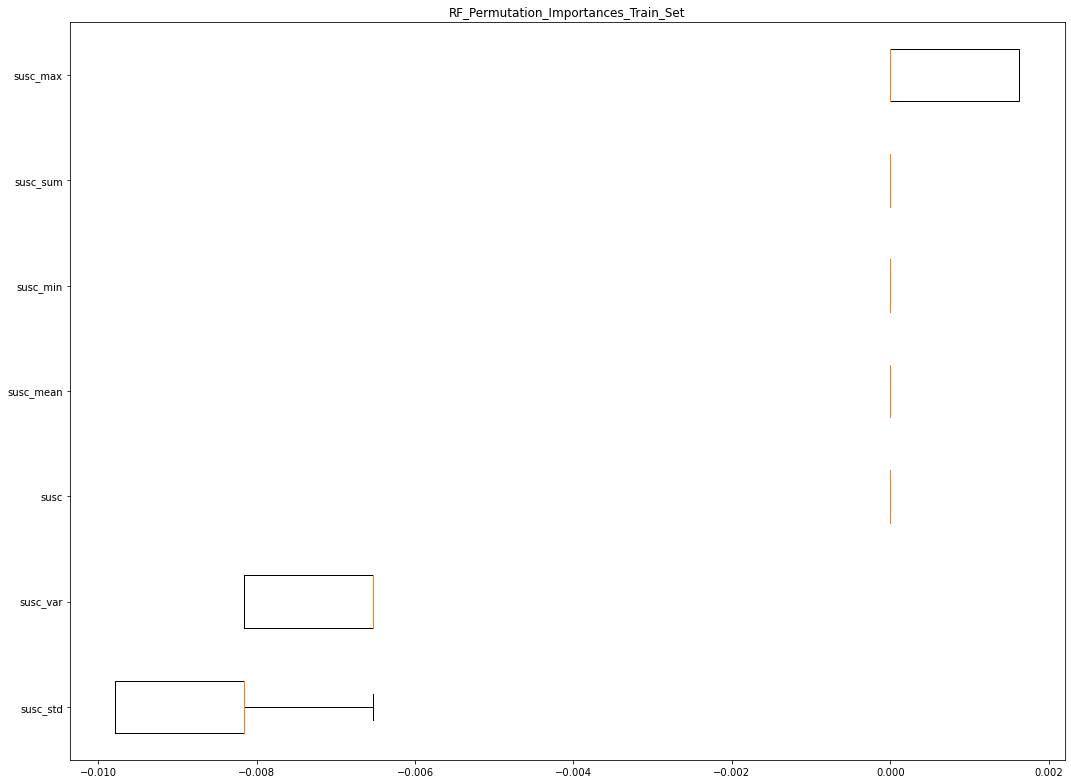

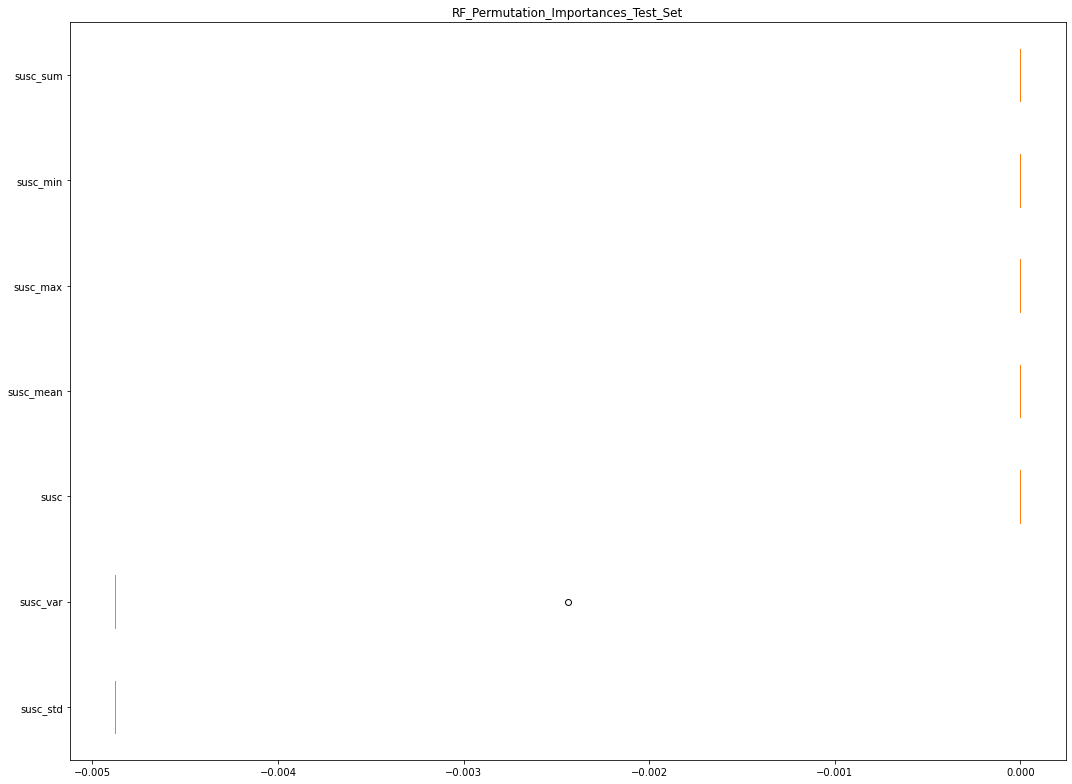

NameError: name 'replace_classes' is not defined

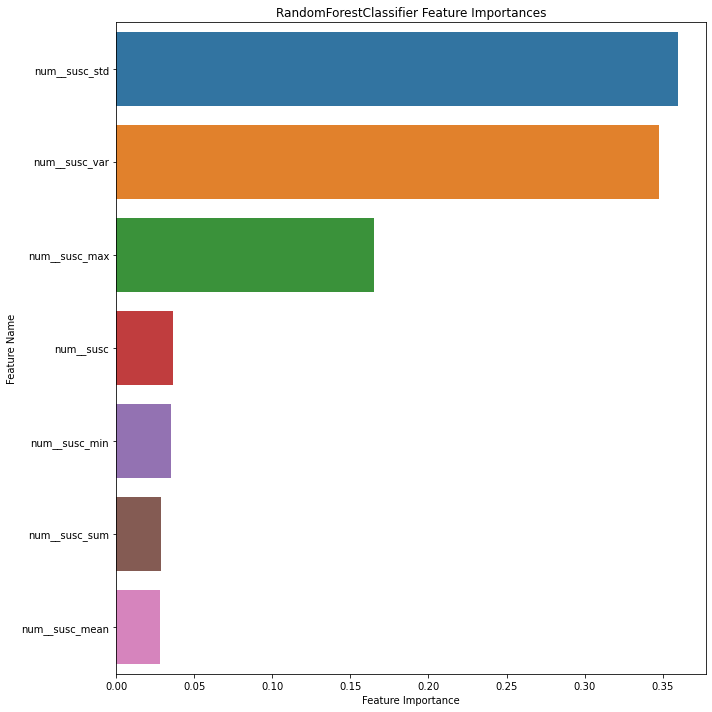

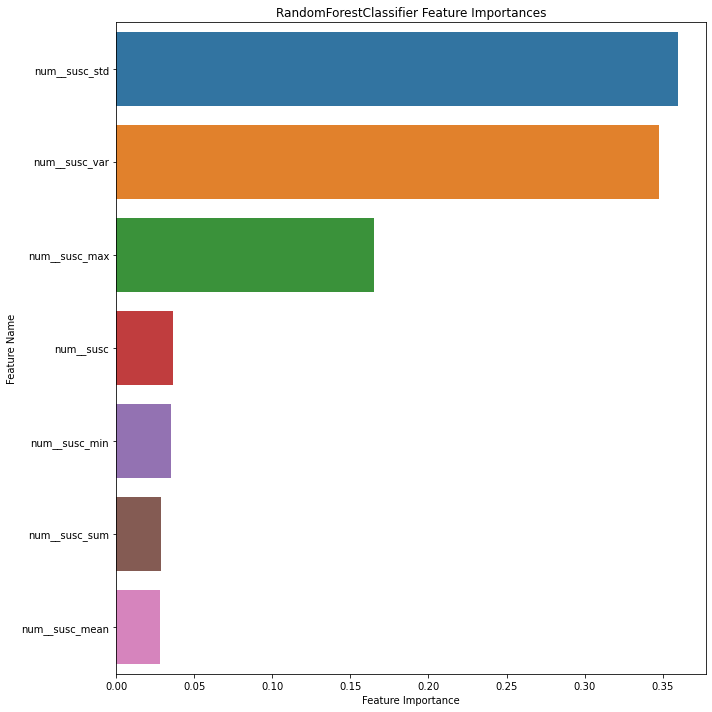

In [47]:
best_fitted_models = hyperparameterstuning.loadJobsFromFolder(output_folder+"/models/")
metrics = {}
for model in best_fitted_models.keys():
    print(model)
    model_path = output_folder + 'models/' + f'{model}.joblib'
    # load models from disk
    if model == 'RandomForest_bestpipeline_fitted_model':
        RandomForest_bestpipeline_fitted_model = load(model_path)
        fe.plot_permutation_importance(RandomForest_bestpipeline_fitted_model, X_train, y_train, output_directory=RF_predictions_folder, 
                            title= 'RF_Permutation_Importances_Train_Set')
        fe.plot_permutation_importance(RandomForest_bestpipeline_fitted_model, X_test, y_test, output_directory=RF_predictions_folder, 
                            title= 'RF_Permutation_Importances_Test_Set')
        fe.plot_feature_importance(RandomForest_bestpipeline_fitted_model,
            output_directory=RF_predictions_folder, 
            title= 'RF_Feature_Importances_Combined.png') 
        fe.plot_feature_importance(RandomForest_bestpipeline_fitted_model,
            output_directory=RF_predictions_folder,
            combine_cat_class_importances = False,
            title= 'RF_Feature_Importances_NotCombined.png')
        # Predictions on the test set
        y_pred = RandomForest_bestpipeline_fitted_model.predict(X_test)
        #y_pred = pd.Series(np.squeeze(y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        prec = precision_score(y_test, y_pred, average="macro")
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        metrics["Random Forest"] = {"f1": f1, "Precision": prec, "Recall":recall, "Accuracy":acc}
        all_predictions = RandomForest_bestpipeline_fitted_model.predict(all_X)
        #all_predictions = pd.Series(np.squeeze(all_predictions))    
        all_predicted_prob = RandomForest_bestpipeline_fitted_model.predict_proba(all_X)
        prob_class = ['0_probability',
                      '1_probability'
                     ]
        predictions = cube.subset(['coordinates'])
        predictions['predictions'] = all_predictions.tolist()
        predictions[prob_class] = all_predicted_prob
        predictions['maxProb'] = np.max(all_predicted_prob, 1)
        from scipy.stats import entropy
        predictions['entropy'] = entropy(all_predicted_prob, axis = 1)/np.log(len(np.unique(y_train)))
        correspondance_dict = {0: "0", 
                               1: "1"
                              }
        actual_classes = y_test.unique().tolist()
        actual_classes.sort()
        classes = replace_classes(actual_classes, correspondance_dict)
        reporting.multiclass_confusion_matrix_plot(y_test, y_pred, actual_classes, RF_predictions_folder)
        reporting.confusion_matrix_plot(y_test, y_pred, title="Random Forest", output_directory=RF_predictions_folder)
        predictions_columns = ['predictions', 
                      '0_probability',
                      '1_probability',
                      'maxProb',
                      'entropy']
        predictions.to_csv(os.path.join(RF_predictions_folder, "predictions.csv"), index=False)
        #utilities.csv_to_raster(predictions, os.path.join(RF_predictions_folder), predictions_columns, None, 'x','y', crs)
        #for predictions_column in predictions_columns:
        #    csv_to_raster_geocube(predictions, 
        #                      os.path.join(RF_predictions_folder, predictions_column + '.tif'), 
        #                      crs,
        #                      'x', 
        #                      'y', 
        #                      predictions_column, 
        #                      xRes=pixel_size, 
        #                      yRes=pixel_size)
        #tifs = glob.glob(RF_predictions_folder + '*.tif')
        #for t in tifs:
        #    filename,  extension, directory= utilities.Path_Info(t)
        #    utilities.geotiff_to_jpg(t, os.path.join(RF_predictions_folder, filename + '.jpg'))
    

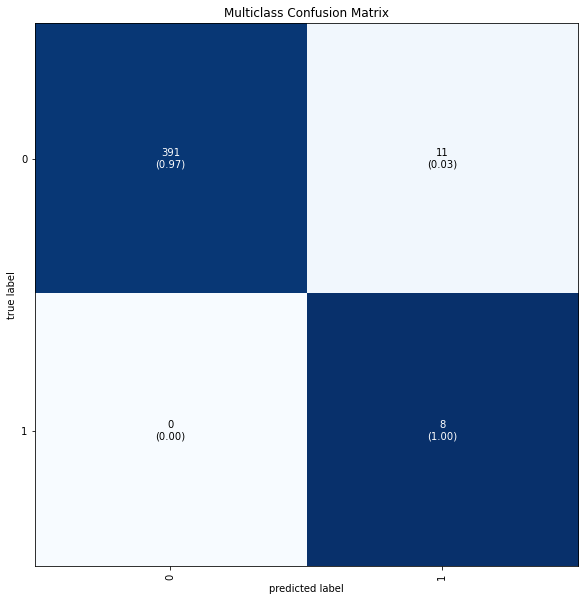

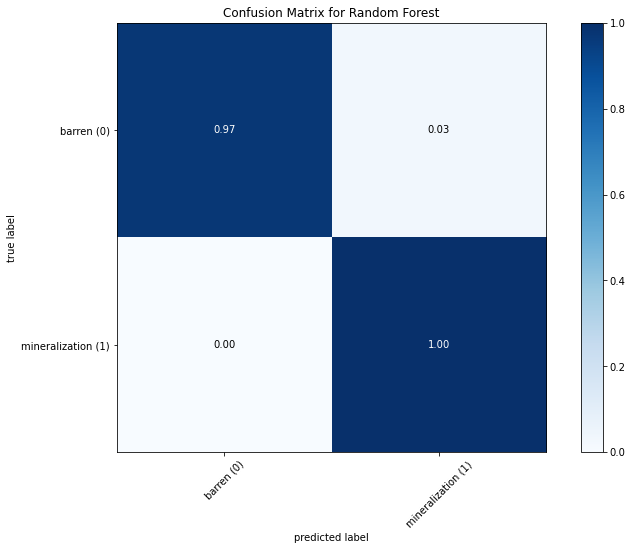

In [49]:
correspondance_dict = {0: "0", 
                      1: "1"
                      }
actual_classes = y_test.unique().tolist()
actual_classes.sort()
classes = replace_classes(actual_classes, correspondance_dict)
reporting.multiclass_confusion_matrix_plot(y_test, y_pred, actual_classes, RF_predictions_folder)
reporting.confusion_matrix_plot(y_test, y_pred, title="Random Forest", output_directory=RF_predictions_folder)
predictions_columns = ['predictions', 
                      '0_probability',
                      '1_probability',
                      'maxProb',
                      'entropy']
predictions.to_csv(os.path.join(RF_predictions_folder, "predictions.csv"), index=False)

CatBoost_bestpipeline_fitted_model


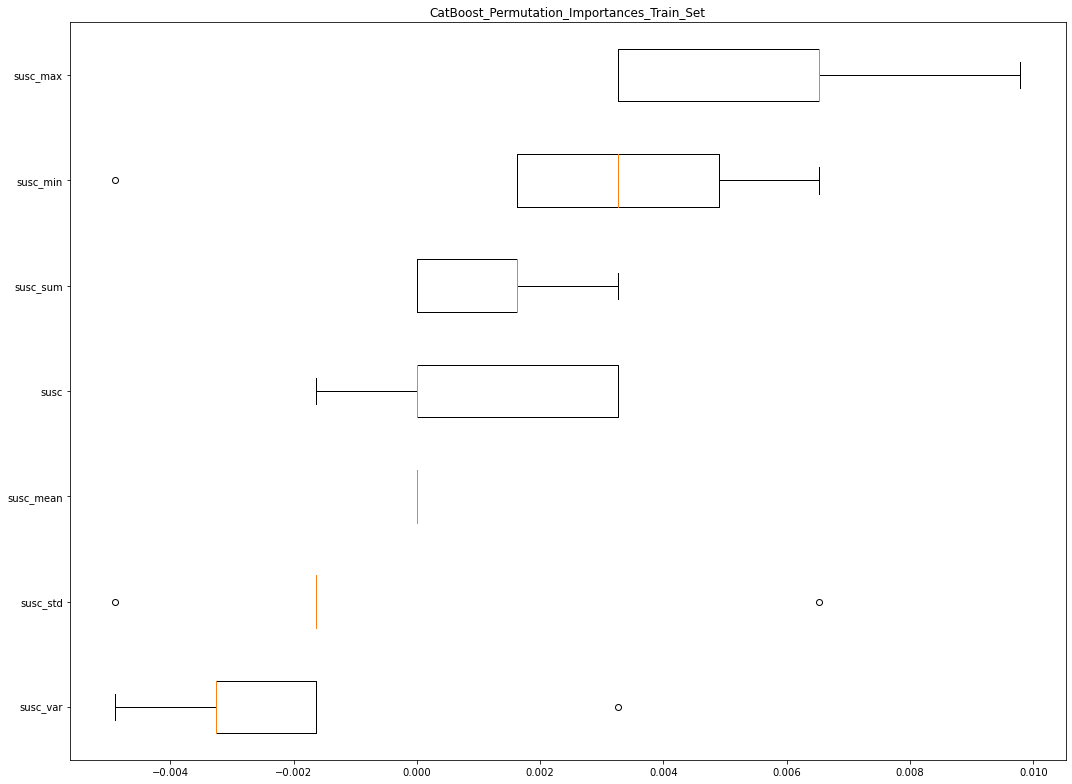

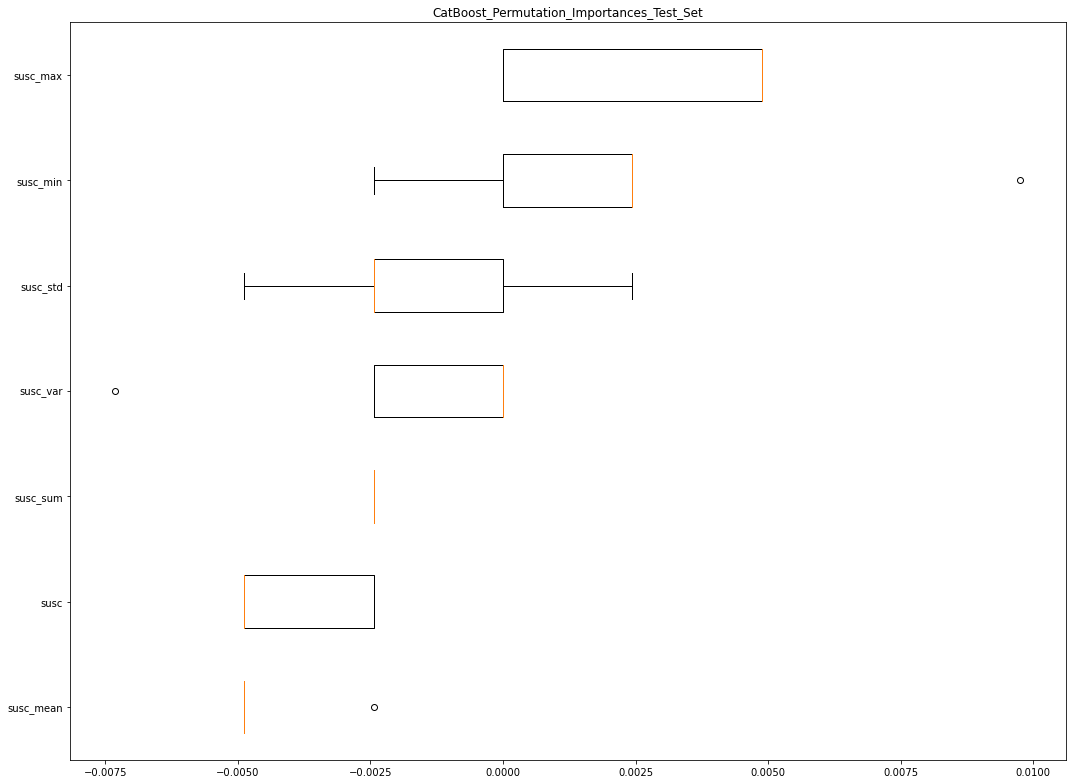

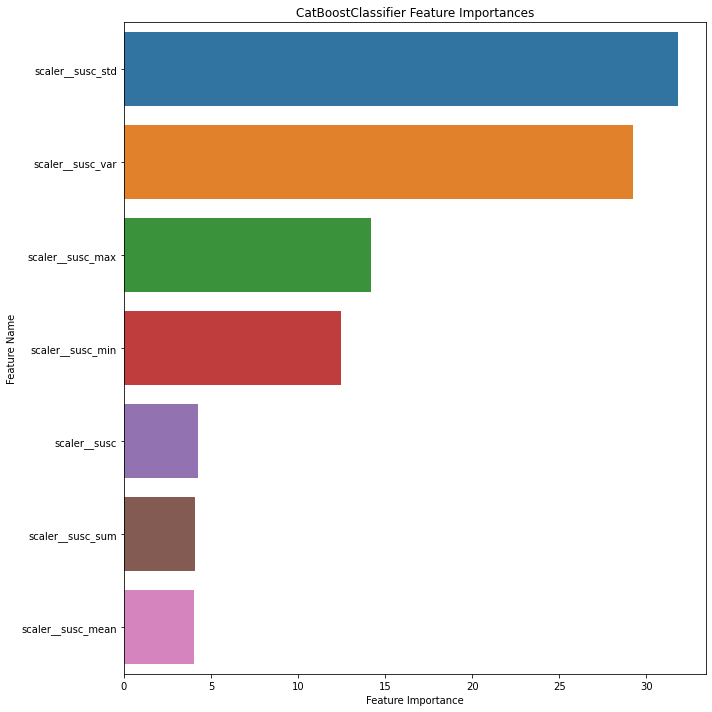

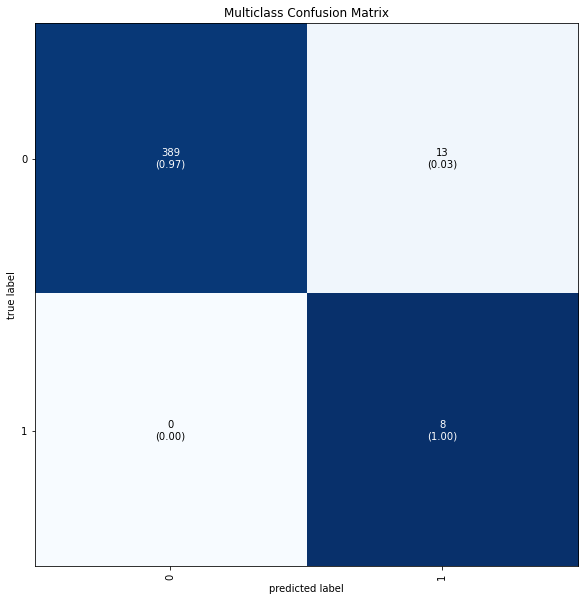

LGBM_bestpipeline_fitted_model


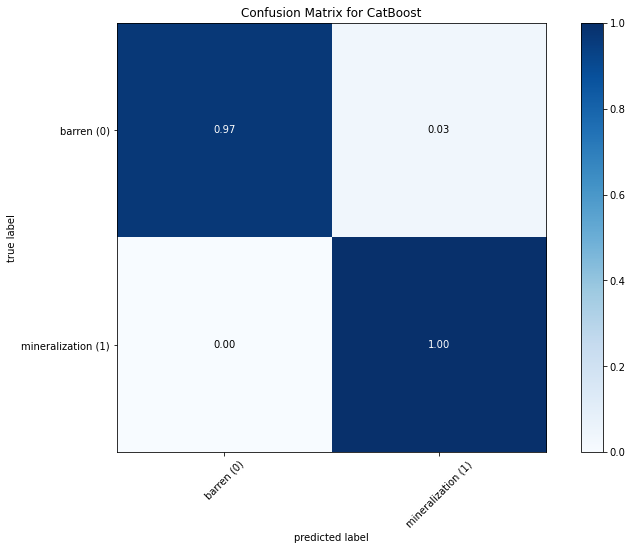

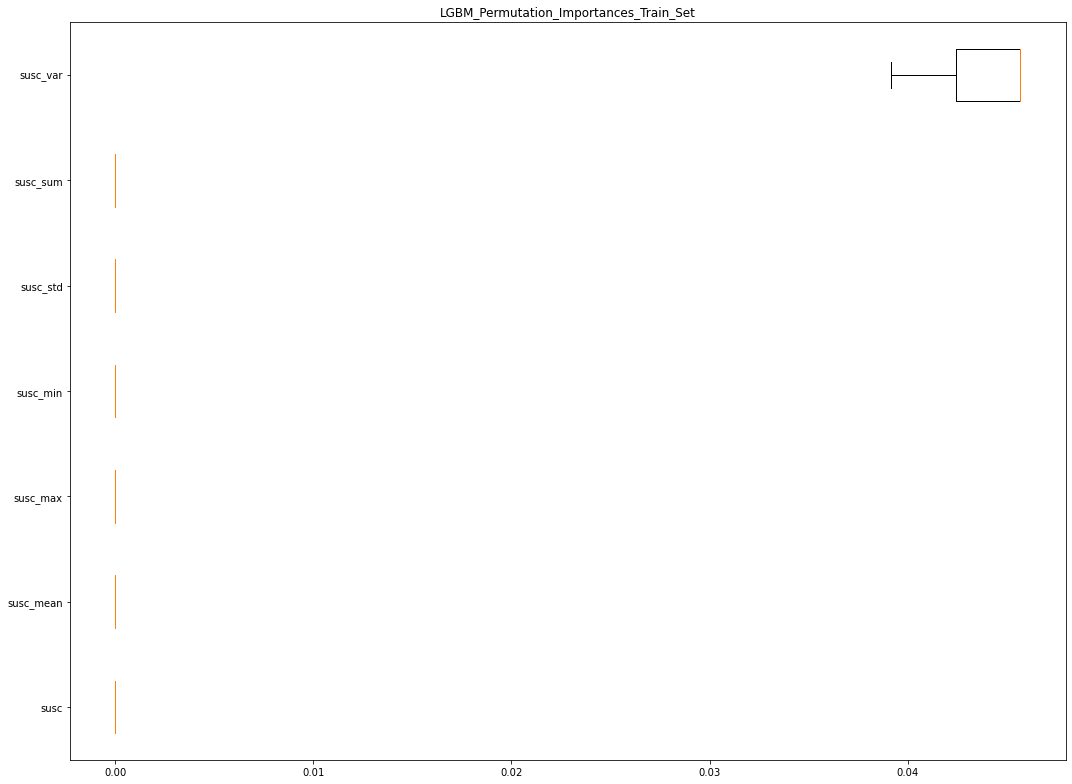

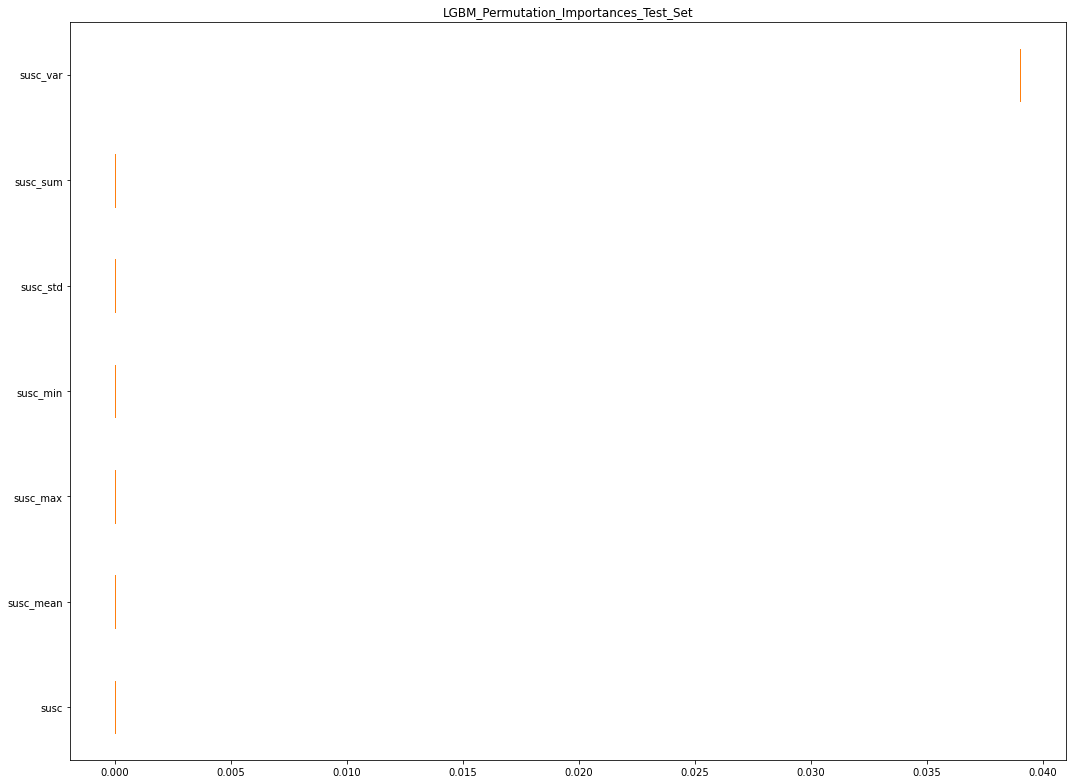

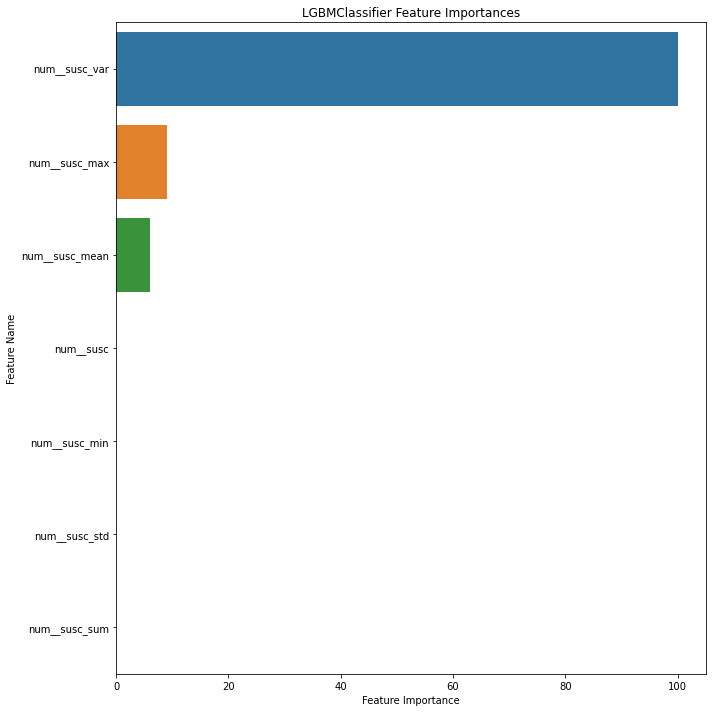

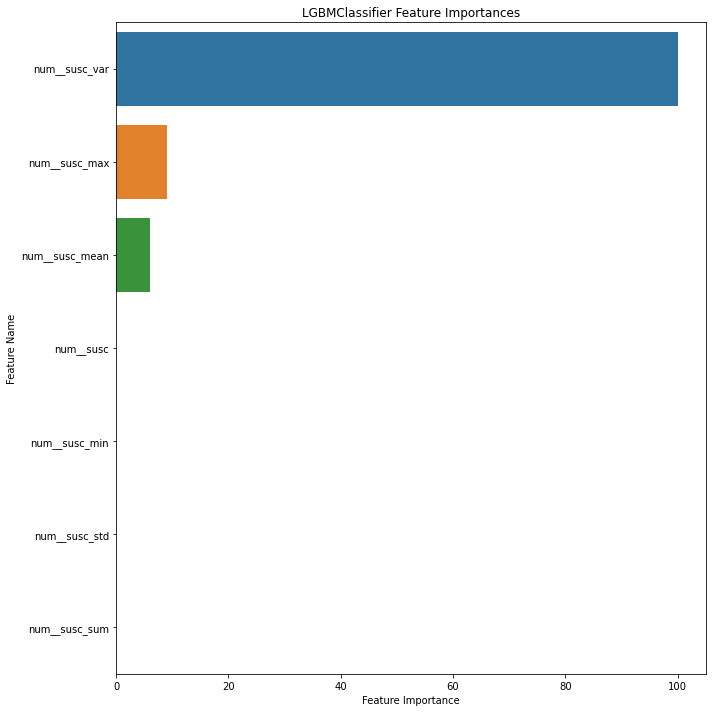

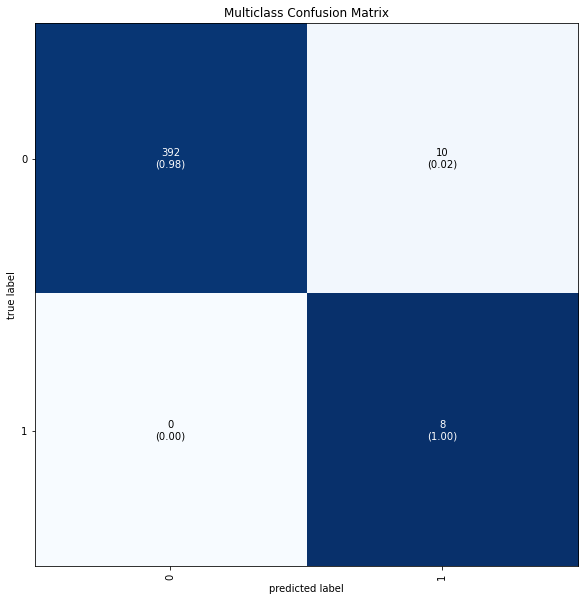

RandomForest_bestpipeline_fitted_model


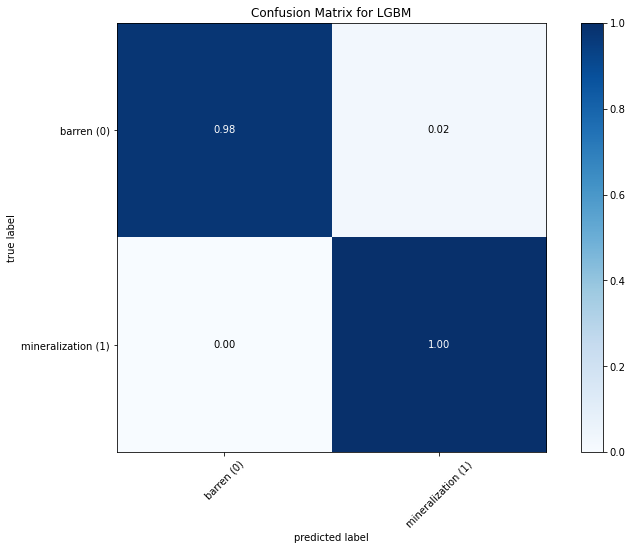

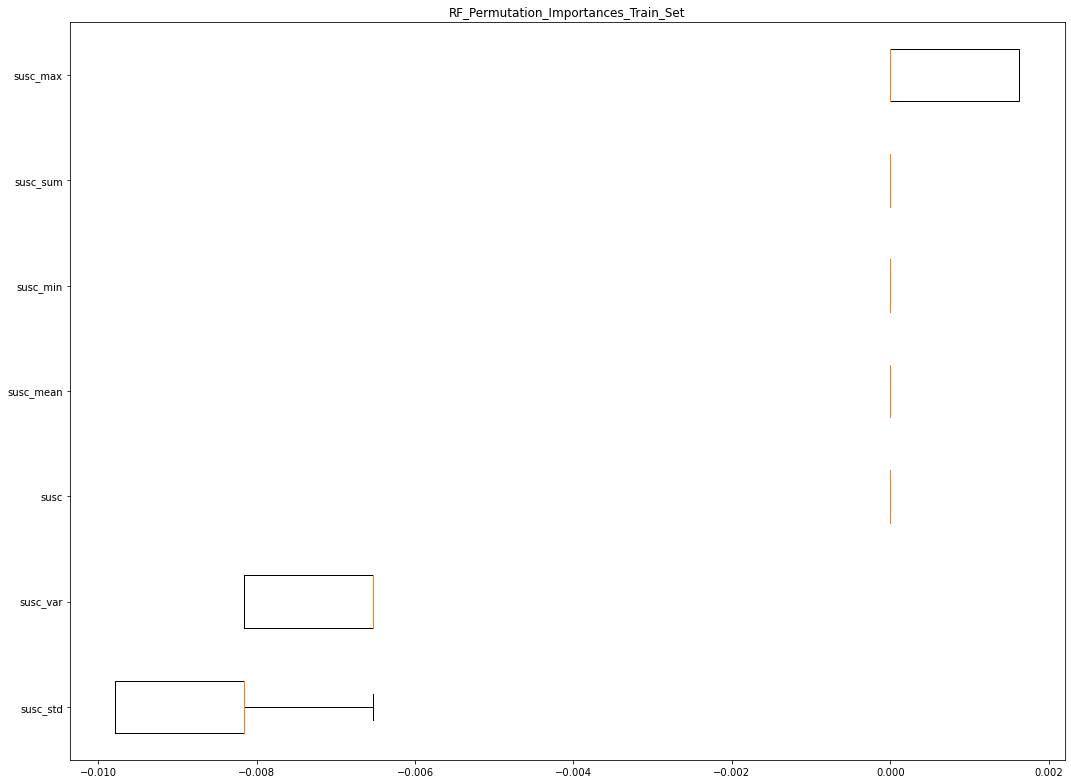

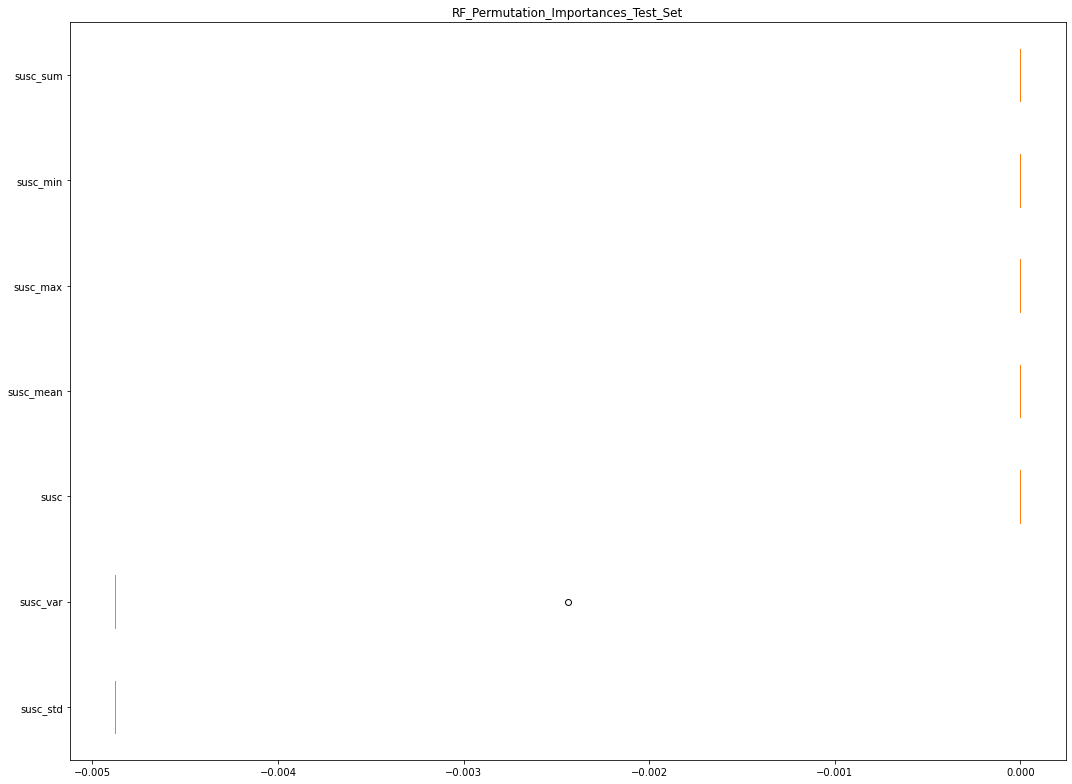

In [ ]:
best_fitted_models = hyperparameterstuning.loadJobsFromFolder(output_folder+"/models/")
metrics = {}
for model in best_fitted_models.keys():
    print(model)
    model_path = output_folder + 'models/' + f'{model}.joblib'
    # load models from disk
    if model == 'SVM_bestpipeline_fitted_model':
        SVM_bestpipeline_fitted_model = load(model_path)
        fe.plot_permutation_importance(SVM_bestpipeline_fitted_model, X_train, y_train, output_directory=SVM_predictions_folder, 
                            title= 'SVM_Permutation_Importances_Train_Set')
        fe.plot_permutation_importance(SVM_bestpipeline_fitted_model, X_test, y_test, output_directory=SVM_predictions_folder, 
                            title= 'SVM_Permutation_Importances_Test_Set')
        # Predictions on the test set
        y_pred = SVM_bestpipeline_fitted_model.predict(X_test)
        #y_pred = pd.Series(np.squeeze(y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        prec = precision_score(y_test, y_pred, average="macro")
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        metrics["SVM"] = {"f1": f1, "Precision": prec, "Recall":recall, "Accuracy":acc}
        all_predictions = SVM_bestpipeline_fitted_model.predict(all_X)
        #all_predictions = pd.Series(np.squeeze(all_predictions))
        all_predicted_prob = SVM_bestpipeline_fitted_model.predict_proba(all_X)
        prob_class = ['0_probability',
                      '1_probability'
                     ]
        predictions = cube.subset(['coordinates'])
        predictions['predictions'] = all_predictions.tolist()
        predictions[prob_class] = all_predicted_prob
        predictions['maxProb'] = np.max(all_predicted_prob, 1)
        from scipy.stats import entropy
        predictions['entropy'] = entropy(all_predicted_prob, axis = 1)/np.log(len(np.unique(y_train)))
        correspondance_dict = {0: "0", 
                               1: "1"
                              }
        actual_classes = y_test.unique().tolist()
        actual_classes.sort()
        classes = replace_classes(actual_classes, correspondance_dict)
        reporting.multiclass_confusion_matrix_plot(y_test, y_pred, actual_classes, SVM_predictions_folder)
        reporting.confusion_matrix_plot(y_test, y_pred, title="SVM", output_directory=SVM_predictions_folder)
        predictions_columns = [
                      'predictions', 
                      '0_probability',
                      '1_probability',
                      'maxProb',
                      'entropy']
        #utilities.csv_to_raster(predictions, os.path.join(SVM_predictions_folder), predictions_columns, None, 'x','y', crs)
        #for predictions_column in predictions_columns:
        #    csv_to_raster_geocube(predictions, 
        #                      os.path.join(SVM_predictions_folder, predictions_column + '.tif'), 
        #                      crs,
        #                      'x', 
        #                      'y', 
        #                      predictions_column, 
        #                      xRes=pixel_size, 
        #                      yRes=pixel_size)
        #tifs = glob.glob(SVM_predictions_folder + '*.tif')        
        #for t in tifs:
        #    filename,  extension, directory= utilities.Path_Info(t)
        #    utilities.geotiff_to_jpg(t, os.path.join(SVM_predictions_folder, filename + '.jpg')) 
    if model == 'CatBoost_bestpipeline_fitted_model':
        CatBoost_bestpipeline_fitted_model = load(model_path)
        fe.plot_permutation_importance(CatBoost_bestpipeline_fitted_model, X_train, y_train, output_directory=CatBoost_predictions_folder, 
                            title= 'CatBoost_Permutation_Importances_Train_Set')
        fe.plot_permutation_importance(CatBoost_bestpipeline_fitted_model, X_test, y_test, output_directory=CatBoost_predictions_folder, 
                            title= 'CatBoost_Permutation_Importances_Test_Set')
        fe.plot_feature_importance(CatBoost_bestpipeline_fitted_model,
                output_directory=CatBoost_predictions_folder, 
                title= 'CatBoost_Feature_Importances.png')         
        # Predictions on the test set
        y_pred = CatBoost_bestpipeline_fitted_model.predict(X_test)
        #y_pred = pd.Series(np.squeeze(y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        prec = precision_score(y_test, y_pred, average="macro")
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        metrics["CatBoost"] = {"f1": f1, "Precision": prec, "Recall":recall, "Accuracy":acc}
        all_predictions = CatBoost_bestpipeline_fitted_model.predict(all_X)
        #all_predictions = pd.Series(np.squeeze(all_predictions))
        all_predicted_prob = CatBoost_bestpipeline_fitted_model.predict_proba(all_X)
        prob_class = ['0_probability',
                      '1_probability'
                     ]
        predictions = cube.subset(['coordinates'])
        predictions['predictions'] = all_predictions.tolist()
        predictions[prob_class] = all_predicted_prob
        predictions['maxProb'] = np.max(all_predicted_prob, 1)
        from scipy.stats import entropy
        predictions['entropy'] = entropy(all_predicted_prob, axis = 1)/np.log(len(np.unique(y_train)))
        correspondance_dict = {0: "0", 
                               1: "1"
                              }
        actual_classes = y_test.unique().tolist()
        actual_classes.sort()
        classes = replace_classes(actual_classes, correspondance_dict)
        reporting.multiclass_confusion_matrix_plot(y_test, y_pred, actual_classes, CatBoost_predictions_folder)
        reporting.confusion_matrix_plot(y_test, y_pred, title="CatBoost", output_directory=CatBoost_predictions_folder)
        predictions_columns = ['predictions', 
                      '0_probability',
                      '1_probability',
                      'maxProb',
                      'entropy']
        predictions.to_csv(os.path.join(CatBoost_predictions_folder, "predictions.csv"), index=False)
        #utilities.csv_to_raster(predictions, os.path.join(CatBoost_predictions_folder), predictions_columns, None, 'x','y', crs)
        #for predictions_column in predictions_columns:
        #    csv_to_raster_geocube(predictions, 
        #                      os.path.join(CatBoost_predictions_folder, predictions_column + '.tif'), 
        #                      crs,
        #                      'x', 
        #                      'y', 
        #                      predictions_column, 
        #                      xRes=pixel_size, 
        #                      yRes=pixel_size)
        #tifs = glob.glob(CatBoost_predictions_folder + '*.tif')
        #for t in tifs:
        #    filename,  extension, directory= utilities.Path_Info(t)
        #    utilities.geotiff_to_jpg(t, os.path.join(CatBoost_predictions_folder, filename + '.jpg'))    
    if model == 'XGBoost_bestpipeline_fitted_model':
        XGBoost_bestpipeline_fitted_model = load(model_path)
        fe.plot_permutation_importance(XGBoost_bestpipeline_fitted_model, X_train, y_train, output_directory=XGBoost_predictions_folder, 
                            title= 'XGBoost_Permutation_Importances_Train_Set')
        fe.plot_permutation_importance(XGBoost_bestpipeline_fitted_model, X_test, y_test, output_directory=XGBoost_predictions_folder, 
                            title= 'XGBoost_Permutation_Importances_Test_Set')
        # Predictions on the test set
        y_pred = XGBoost_bestpipeline_fitted_model.predict(X_test)
        #y_pred = pd.Series(np.squeeze(y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        prec = precision_score(y_test, y_pred, average="macro")
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        metrics["XGBoost"] = {"f1": f1, "Precision": prec, "Recall":recall, "Accuracy":acc}
        all_predictions = XGBoost_bestpipeline_fitted_model.predict(all_X)
        #all_predictions = pd.Series(np.squeeze(all_predictions))
        all_predicted_prob = XGBoost_bestpipeline_fitted_model.predict_proba(all_X)
        prob_class = ['0_probability',
                      '1_probability'
                     ]
        predictions = cube.subset(['coordinates'])
        predictions['predictions'] = all_predictions.tolist()
        predictions[prob_class] = all_predicted_prob
        predictions['maxProb'] = np.max(all_predicted_prob, 1)
        from scipy.stats import entropy
        predictions['entropy'] = entropy(all_predicted_prob, axis = 1)/np.log(len(np.unique(y_train)))
        correspondance_dict = {0: "0", 
                               1: "1"
                              }
        actual_classes = y_test.unique().tolist()
        actual_classes.sort()
        classes = replace_classes(actual_classes, correspondance_dict)
        reporting.multiclass_confusion_matrix_plot(y_test, y_pred, actual_classes, XGBoost_predictions_folder)
        reporting.confusion_matrix_plot(y_test, y_pred, title="XGBoost", output_directory=XGBoost_predictions_folder)
        predictions_columns = ['predictions', 
                      '0_probability',
                      '1_probability',
                      'maxProb',
                      'entropy']
        predictions.to_csv(os.path.join(CatBoost_predictions_folder, "predictions.csv"), index=False)
        #utilities.csv_to_raster(predictions, os.path.join(XGBoost_predictions_folder), predictions_columns, None, 'x','y', crs)
        #for predictions_column in predictions_columns:
        #    csv_to_raster_geocube(predictions, 
        #                      os.path.join(XGBoost_predictions_folder, predictions_column + '.tif'), 
        #                      crs,
        #                      'x', 
        #                      'y', 
        #                      predictions_column, 
        #                      xRes=pixel_size, 
        #                      yRes=pixel_size)
        #tifs = glob.glob(XGBoost_predictions_folder + '*.tif')
        #for t in tifs:
        #    filename,  extension, directory= utilities.Path_Info(t)
        #    utilities.geotiff_to_jpg(t, os.path.join(XGBoost_predictions_folder, filename + '.jpg'))
    if model == 'LGBM_bestpipeline_fitted_model':
        LGBM_bestpipeline_fitted_model = load(model_path)
        fe.plot_permutation_importance(LGBM_bestpipeline_fitted_model, X_train, y_train, output_directory=LGBM_predictions_folder, 
                            title= 'LGBM_Permutation_Importances_Train_Set')
        fe.plot_permutation_importance(LGBM_bestpipeline_fitted_model, X_test, y_test, output_directory=LGBM_predictions_folder, 
                            title= 'LGBM_Permutation_Importances_Test_Set')
        fe.plot_feature_importance(LGBM_bestpipeline_fitted_model,
            output_directory=LGBM_predictions_folder, 
            title= 'LGBM_Feature_Importances_Combined.png') 
        fe.plot_feature_importance(LGBM_bestpipeline_fitted_model,
            output_directory=LGBM_predictions_folder,
            combine_cat_class_importances = False,
            title= 'LGBM_Feature_Importances_NotCombined.png')        
        # Predictions on the test set
        y_pred = LGBM_bestpipeline_fitted_model.predict(X_test)
        #y_pred = pd.Series(np.squeeze(y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        prec = precision_score(y_test, y_pred, average="macro")
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        metrics["LGBM"] = {"f1": f1, "Precision": prec, "Recall":recall, "Accuracy":acc}
        all_predictions = LGBM_bestpipeline_fitted_model.predict(all_X)
        #all_predictions = pd.Series(np.squeeze(all_predictions))
        all_predicted_prob = LGBM_bestpipeline_fitted_model.predict_proba(all_X)
        prob_class = ['0_probability',
                      '1_probability',
                     ]
        predictions = cube.subset(['coordinates'])
        predictions['predictions'] = all_predictions.tolist()
        predictions[prob_class] = all_predicted_prob
        predictions['maxProb'] = np.max(all_predicted_prob, 1)
        from scipy.stats import entropy
        predictions['entropy'] = entropy(all_predicted_prob, axis = 1)/np.log(len(np.unique(y_train)))
        correspondance_dict = {0: "0", 
                               1: "1"
                              }
        actual_classes = y_test.unique().tolist()
        actual_classes.sort()
        classes = replace_classes(actual_classes, correspondance_dict)
        reporting.multiclass_confusion_matrix_plot(y_test, y_pred, actual_classes, LGBM_predictions_folder)
        reporting.confusion_matrix_plot(y_test, y_pred, title="LGBM", output_directory=LGBM_predictions_folder)
        predictions_columns = ['predictions', 
                      '0_probability',
                      '1_probability',
                      'maxProb',
                      'entropy']
        predictions.to_csv(os.path.join(LGBM_predictions_folder, "predictions.csv"), index=False)
        #utilities.csv_to_raster(predictions, os.path.join(LGBM_predictions_folder), predictions_columns, None, 'x','y', crs)
        #for predictions_column in predictions_columns:
        #    csv_to_raster_geocube(predictions, 
        #                      os.path.join(LGBM_predictions_folder, predictions_column + '.tif'), 
        #                      crs,
        #                      'x', 
        #                      'y', 
        #                      predictions_column, 
        #                      xRes=pixel_size, 
        #                      yRes=pixel_size)
        #tifs = glob.glob(LGBM_predictions_folder + '*.tif')
        #for t in tifs:
        #    filename,  extension, directory= utilities.Path_Info(t)
        #    utilities.geotiff_to_jpg(t, os.path.join(LGBM_predictions_folder, filename + '.jpg'))
    if model == 'RandomForest_bestpipeline_fitted_model':
        RandomForest_bestpipeline_fitted_model = load(model_path)
        fe.plot_permutation_importance(RandomForest_bestpipeline_fitted_model, X_train, y_train, output_directory=RF_predictions_folder, 
                            title= 'RF_Permutation_Importances_Train_Set')
        fe.plot_permutation_importance(RandomForest_bestpipeline_fitted_model, X_test, y_test, output_directory=RF_predictions_folder, 
                            title= 'RF_Permutation_Importances_Test_Set')
        fe.plot_feature_importance(RandomForest_bestpipeline_fitted_model,
            output_directory=RF_predictions_folder, 
            title= 'RF_Feature_Importances_Combined.png') 
        fe.plot_feature_importance(RandomForest_bestpipeline_fitted_model,
            output_directory=RF_predictions_folder,
            combine_cat_class_importances = False,
            title= 'RF_Feature_Importances_NotCombined.png')
        # Predictions on the test set
        y_pred = RandomForest_bestpipeline_fitted_model.predict(X_test)
        #y_pred = pd.Series(np.squeeze(y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        prec = precision_score(y_test, y_pred, average="macro")
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        metrics["Random Forest"] = {"f1": f1, "Precision": prec, "Recall":recall, "Accuracy":acc}
        all_predictions = RandomForest_bestpipeline_fitted_model.predict(all_X)
        #all_predictions = pd.Series(np.squeeze(all_predictions))    
        all_predicted_prob = RandomForest_bestpipeline_fitted_model.predict_proba(all_X)
        prob_class = ['0_probability',
                      '1_probability'
                     ]
        predictions = cube.subset(['coordinates'])
        predictions['predictions'] = all_predictions.tolist()
        predictions[prob_class] = all_predicted_prob
        predictions['maxProb'] = np.max(all_predicted_prob, 1)
        from scipy.stats import entropy
        predictions['entropy'] = entropy(all_predicted_prob, axis = 1)/np.log(len(np.unique(y_train)))
        correspondance_dict = {0: "0", 
                               1: "1"
                              }
        actual_classes = y_test.unique().tolist()
        actual_classes.sort()
        classes = replace_classes(actual_classes, correspondance_dict)
        reporting.multiclass_confusion_matrix_plot(y_test, y_pred, actual_classes, RF_predictions_folder)
        reporting.confusion_matrix_plot(y_test, y_pred, title="Random Forest", output_directory=RF_predictions_folder)
        predictions_columns = ['predictions', 
                      '0_probability',
                      '1_probability',
                      'maxProb',
                      'entropy']
        predictions.to_csv(os.path.join(RF_predictions_folder, "predictions.csv"), index=False)
        #utilities.csv_to_raster(predictions, os.path.join(RF_predictions_folder), predictions_columns, None, 'x','y', crs)
        #for predictions_column in predictions_columns:
        #    csv_to_raster_geocube(predictions, 
        #                      os.path.join(RF_predictions_folder, predictions_column + '.tif'), 
        #                      crs,
        #                      'x', 
        #                      'y', 
        #                      predictions_column, 
        #                      xRes=pixel_size, 
        #                      yRes=pixel_size)
        #tifs = glob.glob(RF_predictions_folder + '*.tif')
        #for t in tifs:
        #    filename,  extension, directory= utilities.Path_Info(t)
        #    utilities.geotiff_to_jpg(t, os.path.join(RF_predictions_folder, filename + '.jpg'))

In [59]:
best_fitted_models = hyperparameterstuning.loadJobsFromFolder(output_folder+"/models/")
metrics = {}
for model in best_fitted_models.keys():
    print(model)
    model_path = output_folder + 'models/' + f'{model}.joblib'
    # load models from disk
    if model == 'SVM_bestpipeline_fitted_model':
        SVM_bestpipeline_fitted_model = load(model_path)

        # Predictions on the test set
        y_pred = SVM_bestpipeline_fitted_model.predict(X_test)
        #y_pred = pd.Series(np.squeeze(y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        prec = precision_score(y_test, y_pred, average="macro")
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        metrics["SVM"] = {"f1": f1, "Precision": prec, "Recall":recall, "Accuracy":acc}

    if model == 'CatBoost_bestpipeline_fitted_model':
        CatBoost_bestpipeline_fitted_model = load(model_path)

        # Predictions on the test set
        y_pred = CatBoost_bestpipeline_fitted_model.predict(X_test)
        #y_pred = pd.Series(np.squeeze(y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        prec = precision_score(y_test, y_pred, average="macro")
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        metrics["CatBoost"] = {"f1": f1, "Precision": prec, "Recall":recall, "Accuracy":acc}
   
    if model == 'XGBoost_bestpipeline_fitted_model':
        XGBoost_bestpipeline_fitted_model = load(model_path)

        # Predictions on the test set
        y_pred = XGBoost_bestpipeline_fitted_model.predict(X_test)
        #y_pred = pd.Series(np.squeeze(y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        prec = precision_score(y_test, y_pred, average="macro")
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        metrics["XGBoost"] = {"f1": f1, "Precision": prec, "Recall":recall, "Accuracy":acc}

    if model == 'LGBM_bestpipeline_fitted_model':
        LGBM_bestpipeline_fitted_model = load(model_path)

        # Predictions on the test set
        y_pred = LGBM_bestpipeline_fitted_model.predict(X_test)
        #y_pred = pd.Series(np.squeeze(y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        prec = precision_score(y_test, y_pred, average="macro")
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        metrics["LGBM"] = {"f1": f1, "Precision": prec, "Recall":recall, "Accuracy":acc}

    if model == 'RandomForest_bestpipeline_fitted_model':
        RandomForest_bestpipeline_fitted_model = load(model_path)

        # Predictions on the test set
        y_pred = RandomForest_bestpipeline_fitted_model.predict(X_test)
        #y_pred = pd.Series(np.squeeze(y_pred))
        f1 = f1_score(y_test, y_pred, average="macro")
        prec = precision_score(y_test, y_pred, average="macro")
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        metrics["Random Forest"] = {"f1": f1, "Precision": prec, "Recall":recall, "Accuracy":acc}


CatBoost_bestpipeline_fitted_model
LGBM_bestpipeline_fitted_model
RandomForest_bestpipeline_fitted_model


In [60]:
metrics

{'CatBoost': {'f1': 0.7676446226949736,
  'Precision': 0.6904761904761905,
  'Recall': 0.9838308457711442,
  'Accuracy': 0.9682926829268292},
 'LGBM': {'f1': 0.801395078473164,
  'Precision': 0.7222222222222222,
  'Recall': 0.9875621890547264,
  'Accuracy': 0.975609756097561},
 'Random Forest': {'f1': 0.7893606090327401,
  'Precision': 0.7105263157894737,
  'Recall': 0.986318407960199,
  'Accuracy': 0.973170731707317}}

In [61]:
import json

def compare_metrics(metrics, output_folder=None, save_csv=True, save_json=True, **kwargs):
    """
    Compare metrics and create a plot of metrics provided in the nested dictionary
    metrics dict is the output of hyperparameterstuning.get_results_from_studies written by Manit!
    In order for this function to work, the metrics format must be like the example below.
    
    Parameters
    ----------
    metrics : dictionary or path to the json file
        Dictionary with all models and related metrics
    set_size : OPTIONAL, tuple
        Set the figure size in inches -> Example: (15, 11)
    output_folder : OPTIONAL, str
        The path of the plot of metrics
    save_csv : True (By default)
        Saves the metrics dataframe if output_folder is provided by the user 
    save_json : True (By default)
        Saves the metrics dictionary as a JSON file if output_folder is provided by the user
    Example:
    
    metrics = {'CatBoost': {'fit_time': 7.048,
      'test_f1_macro': 0.5468,
      'train_f1_macro': 0.5767,
      'test_stdf1_macro': 0.0101,
      'train_stdf1_macro': 0.0032,
      'test_precision_macro': 0.5553,
      'train_precision_macro': 0.5827,
      'test_stdprecision_macro': 0.0086,
      'train_stdprecision_macro': 0.0058,
      'test_accuracy': 0.5782,
      'train_accuracy': 0.6034,
      'test_stdaccuracy': 0.0093,
      'train_stdaccuracy': 0.0031},
         'LGBM': {'fit_time': 1.0172,
      'test_f1_macro': 0.7446,
      'train_f1_macro': 0.8498,
      'test_stdf1_macro': 0.0142,
      'train_stdf1_macro': 0.0056,
      'test_precision_macro': 0.7223,
      'train_precision_macro': 0.8207,
      'test_stdprecision_macro': 0.0148,
      'train_stdprecision_macro': 0.0056,
      'test_accuracy': 0.7711,
      'train_accuracy': 0.8595,
      'test_stdaccuracy': 0.0148,
      'train_stdaccuracy': 0.0056},
         'RandomForest': {'fit_time': 52.1184,
      'test_f1_macro': 0.7428,
      'train_f1_macro': 0.8484,
      'test_stdf1_macro': 0.02,
      'train_stdf1_macro': 0.0026,
      'test_precision_macro': 0.7207,
      'train_precision_macro': 0.8199,
      'test_stdprecision_macro': 0.0199,
      'train_stdprecision_macro': 0.0028,
      'test_accuracy': 0.7687,
      'train_accuracy': 0.8555,
      'test_stdaccuracy': 0.0164,
      'train_stdaccuracy': 0.0029},
        'XGBoost': {'fit_time': 21.6675,
      'test_f1_macro': 0.7397,
      'train_f1_macro': 0.8486,
      'test_stdf1_macro': 0.0156,
      'train_stdf1_macro': 0.0063,
      'test_precision_macro': 0.7166,
      'train_precision_macro': 0.8196,
      'test_stdprecision_macro': 0.0153,
      'train_stdprecision_macro': 0.006,
      'test_accuracy': 0.7667,
      'train_accuracy': 0.8579,
      'test_stdaccuracy': 0.0139,
      'train_stdaccuracy': 0.007}}
    experiment_name = 'Update'
    output_folder = os.path.join(experiment_name, 'outputs/')
    if not os.path.exists(output_folder): os.makedirs(output_folder)  
   
    utilities.compare_metrics(metrics, output_folder=output_folder)
    
    """

    if type(metrics) == dict:
        # if metrics is a nested dictionary
        metrics_df = pd.DataFrame(metrics)
        metrics_df = metrics_df.reindex(metrics_df.mean().sort_values().index, axis=1)

        if output_folder != None and save_json == True:
            output_json_name = os.path.join(output_folder, 'metrics.json')
            with open(os.path.join(output_json_name), 'w') as file_json: 
                json.dump(metrics, file_json)

    elif type(metrics) == str:
        # If metrics is the path to the json file
        file, extension, directory = utilities.Path_Info(metrics)
        if (extension == '.json'):
            with open(metrics, 'r') as json_file: json_data = json.load(json_file)
            metrics_df = pd.DataFrame(json_data)
            metrics_df = metrics_df.reindex(metrics_df.mean().sort_values().index, axis=1)
    
    std_list = [] # List for standard deviations
    exclusion_list = [] # List used to eliminate fit time and standard deviations in the metrics dictionary
    
    # Let's find the indexes which contains 'std' and fit_time 
    for index in metrics_df.index.to_list():
        if 'std' in index or 'fit_time' in index:
            exclusion_list.append(index)
        if 'std' in index:
            std_list.append(index)
    
    # Let's define just_metric_df containing only metrics (No std and no fit_time!)
    just_metrics_df = metrics_df[~metrics_df.index.isin(exclusion_list)]
    
    if len(std_list) >= 1: 
        if "set_size" in kwargs:
            ax = just_metrics_df.transpose().plot(figsize=(kwargs['set_size'][0], kwargs['set_size'][1]), zorder=10, kind='barh', xerr=np.array(metrics_df[metrics_df.index.isin(std_list)]), width=0.8)
        else:
            ax = just_metrics_df.transpose().plot(figsize=(12,8), zorder=10., kind='barh', xerr=np.array(metrics_df[metrics_df.index.isin(std_list)]), width=0.8)
    elif len(std_list) == 0:
        if "set_size" in kwargs:
            ax = just_metrics_df.transpose().plot(figsize=(kwargs['set_size'][0], kwargs['set_size'][1]), zorder=10, kind='barh', width=0.8)
        else:
            ax = just_metrics_df.transpose().plot(figsize=(12,8), zorder=10., kind='barh', width=0.8)        
        
    ax.set_title('Model Comparison', fontsize=20)
    ax.set_xlabel("Score", size = 20)
    ax.set_yticklabels(just_metrics_df.transpose().index.values.tolist(), rotation=45, 
                   rotation_mode="anchor", 
                   size = 15)
    ax.set_xlim([0.0, 1.0])
    ax.set_xticks(np.linspace(0, 1, 11, endpoint = True))
    ax.legend()
    ax.grid(zorder=5)
    leg = ax.legend(loc='upper left', fontsize=10, ncol=1, framealpha=.9)
    leg.set_zorder(100)
       
    if output_folder != None:
        if "title" in kwargs:
            plt.savefig(os.path.join(output_folder, kwargs['title']), dpi=100)
        else:
            plt.savefig(os.path.join(output_folder, 'model_comparison.png'), dpi=100)
      
        if save_csv == True: 
            metrics_df.to_csv(os.path.join(output_folder, 'metrics_df.csv'))
          
    return metrics_df


,CatBoost,Random Forest,LGBM
f1,0.767645,0.789361,0.801395
Precision,0.690476,0.710526,0.722222
Recall,0.983831,0.986318,0.987562
Accuracy,0.968293,0.973171,0.975610


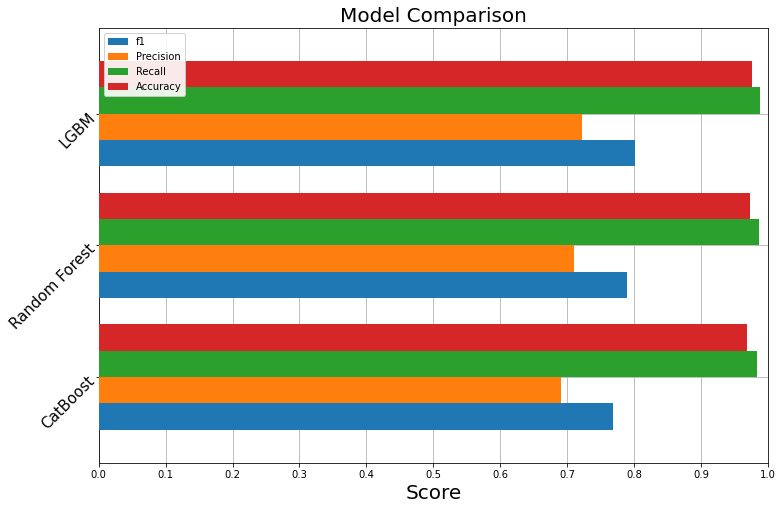

In [62]:
compare_metrics(metrics, output_folder=output_folder, save_csv=True, save_json=True)

In [74]:
import imblearn
import catboost
import fasttreeshap
import warnings
from sklearn.svm import SVC

def plot_shap_values(model, X_test, combine_cat_class_importances = True, **kwargs):
    """
    Create a plot of shap values for a given pre-fitted estimator. SHAP VALUES DO NOT SUPPORT STACKING CLASSIFIERS
    Parameters
    ----------
    model : imblearn.pipeline.Pipeline model or sklearn classifier
    X_test : pandas.DataFrame
        The test portion of a dataset
    combine_cat_class_importances : OPTIONAL, boolean, default TRUE
        For a non-CatBoost model (Random Forest, LGBM, XGBoost) with some categorical variables,
        It sum up the categorical shap values after One Hot Encoding is applied.
        If you want to see the shap values for each OneHotEncoded feature separately, set it to False.            
    set_size : OPTIONAL, tuple
        Set the figure size in inches -> Example: (15, 11)
    output_directory : OPTIONAL, str
        The path of the plot
    """
    # REFERENCES :
    # https://github.com/slundberg/shap/issues/406
    # PROBLEM #1 : plot shap_values was plotting categorical variables in gray (see ref above)
    # FIXED #1 : PROBLEM #1 has been resolved. 'features' object of shap.summary_plot must be a numpy array, not a dataframe.

    # PROBLEM #2 : Plot shap values of OneHotEncoded columns in terms of original categorical feature (Fixed!)
    
    # PROBLEM #3 : We will update the code for more than one raw categorical features (Next update!)
    
    if type(model) == imblearn.pipeline.Pipeline:
        # If the user is using a pipeline model, 
        # the shap values are calculated in this if block!

        pre_model = model['pre'] # Pre step of the pipeline
        classifier = model['clf'] # Classifier of the pipeline
        ct = model.named_steps['pre'] # Define the column transform for the given pipeline model          
        
        if type(classifier) == catboost.core.CatBoostClassifier:
            explainer = fasttreeshap.TreeExplainer(classifier, feature_names=X_test.columns.tolist())
            (n, d) = X_test.shape
            
        elif type(classifier) == SVC:   
            svm_explainer = shap.KernelExplainer(classifier.predict, X_test)
            (n, d) = X_test.shape
       
        elif type(classifier) != catboost.core.CatBoostClassifier and type(classifier) != SVC:
            # When the user uses a non-CatBoost model (Random Forest, LGBM, XGBoost) with some categorical variables, 
            # the "pre" step of the pipeline applies OneHotEncoder for categorical variables. 
            # In other words, the dimension of X_train and X_test change at the "pre" stage of the pipeline. 
            # For this reason, the columns of X_test are not recognized by the bestpipeline_fitted_model, 
            # but the columns of the column-transformed version are. 
            # Therefore, we need to apply a column transform first and then check the shap values of individual OneHotEncoder columns.
                                    
            X_test_transform = pd.DataFrame(ct.transform(X_test), columns= pre_model.get_feature_names_out().tolist())    
            explainer = fasttreeshap.TreeExplainer(classifier, feature_names=X_test_transform.columns.tolist())
            (n, d) = X_test_transform.shape
                
    else:
        explainer = fasttreeshap.TreeExplainer(model, feature_names=X_test.columns.tolist())
        (n, d) = X_test.shape    

    # Plotting part starts here!
    # The plotting part can be written in a cleaner way.
    # However, shap.summary_plot calls 'plt.show()' to ensure the plot displays, which makes it
    # a bit difficult to save two consecutive summary plots.
    # Therefore, we have to set 'show=False' for the first shap.summary_plot.
    # If an output_directory is set, only the second plot will be displayed, but both plots will be saved separately.
    # If an output_directory is NOT set, then both plots will be displayed. However, none of them will be saved.
    
    if "output_directory" in kwargs:
        show=False
        if not os.path.exists(kwargs['output_directory']):
            os.makedirs(kwargs['output_directory'])
    else:
        show=True    
    
    # Let's compute shap values and plot the first summary_plot
    if type(model) == imblearn.pipeline.Pipeline:
        if type(classifier) == catboost.core.CatBoostClassifier:
            shap_vals = explainer.shap_values(X_test)
            fasttreeshap.summary_plot(shap_vals, features=np.array(X_test), feature_names=X_test.columns, max_display = d, show=show)
        elif type(classifier) == SVC:
            shap_vals = svm_explainer.shap_values(X_test)
            shap.summary_plot(shap_vals, features=np.array(X_test), feature_names=X_test.columns)
        elif combine_cat_class_importances and type(classifier) != catboost.core.CatBoostClassifier and type(classifier) != SVC:
            # The shap values of the OneHotEncoder columns will be written 
            # in terms of the original categorical feature.    
            warnings.warn("The current version of plot_shap_values sum the shap values of OneHotEncoded columns by default." + os.linesep +
                "However, it assumes that the data cube has only one categorical property." + os.linesep +
                "If you have more than one categorical features, please combine_cat_class_importances = False." + os.linesep +
                "In the next update the function will work with more than one original categorical features.")
                        
            shap_vals = explainer.shap_values(X_test_transform)
            num_features_indices = []
            cat_features_indices = []
            arr_combined_list_list = []

            for count, element in enumerate(explainer.feature_names):
                if element.startswith('cat'):
                    cat_features_indices.append(count)
                else:
                    num_features_indices.append(count)

            for i in range(len(shap_vals)):
                shap_arr = shap_vals[i]
                j, k = shap_arr.shape
    
                arr_combined_list = []
    
                for j in range(j):
                    num_shap_arr = shap_arr[j, num_features_indices]
                    cat_shap_arr = shap_arr[j, cat_features_indices].sum()
                    arr_combined = np.append(num_shap_arr, cat_shap_arr)
                    arr_combined_list.append(arr_combined)
    
                arr_combined_arr = np.array(arr_combined_list)
                arr_combined_list_list.append(arr_combined_arr) # arr_combined_list_list is the modified version of shap_vals
            
            fasttreeshap.summary_plot(arr_combined_list_list, 
                          features=np.array(X_test), 
                          feature_names=X_test.columns, 
                          max_display = d, 
                          show=show)            
        
        elif combine_cat_class_importances == False and type(classifier) != catboost.core.CatBoostClassifier and type(classifier) != SVC:
            # If the user want to see the shap values for each OneHotEncoded feature separately, combine_cat_class_importances will be set to False.
            # In this case, the shap values will be calculated as follows:
            shap_vals = explainer.shap_values(X_test_transform)
            fasttreeshap.summary_plot(shap_vals, 
                                      features=np.array(X_test_transform), 
                                      feature_names=X_test_transform.columns, 
                                      max_display = d, 
                                      show=show)            
    else:
        shap_vals = explainer.shap_values(X_test)
        fasttreeshap.summary_plot(shap_vals, features=np.array(X_test), feature_names=X_test.columns, max_display = d, show=show)
    
    # "set_size" is OPTIONAL to change the size of the figures
    if "set_size" in kwargs:
        fig1 = plt.gcf()
        fig1.set_size_inches(kwargs['set_size'][0], kwargs['set_size'][1])
        fig1.tight_layout()
    else:
        fig1 = plt.gcf()
        fig1.set_size_inches(12, 12)
        fig1.tight_layout()

    if "output_directory" in kwargs:
        fig1.savefig(os.path.join(kwargs['output_directory'], 'shap_summary.png'))
        fig1.clf()

    # Let's plot the second summary_plot with a plot_type="bar"   
    if type(model) == imblearn.pipeline.Pipeline:
        if type(classifier) == catboost.core.CatBoostClassifier:
            fasttreeshap.summary_plot(shap_vals, 
                                      features=np.array(X_test), 
                                      feature_names=X_test.columns, 
                                      plot_type="bar", 
                                      max_display = d, 
                                      show=show)
        elif type(classifier) == SVC:
            shap.summary_plot(shap_vals, 
                              features=np.array(X_test), 
                              feature_names=X_test.columns,
                              plot_type="bar", 
                              max_display = d, 
                              show=show)
                                   
        elif combine_cat_class_importances and type(classifier) != catboost.core.CatBoostClassifier and type(classifier) != SVC:
            # The shap values of the OneHotEncoder columns will be written 
            # in terms of the original categorical feature.
            fasttreeshap.summary_plot(arr_combined_list_list, 
                          features=np.array(X_test), 
                          feature_names=X_test.columns,
                          plot_type="bar",
                          max_display = d, 
                          show=show)
        elif combine_cat_class_importances == False and type(classifier) != catboost.core.CatBoostClassifier and type(classifier) != SVC:
            # If the user want to see the shap values for each OneHotEncoded feature separately, combine_cat_class_importances will be set to False.
            # In this case, the shap values will be calculated as follows:
            shap_vals = explainer.shap_values(X_test_transform)
            fasttreeshap.summary_plot(shap_vals, 
                                      features=np.array(X_test_transform),
                                      feature_names=X_test_transform.columns,
                                      plot_type="bar", 
                                      max_display = d,
                                      show=show)
    else:
        fasttreeshap.summary_plot(shap_vals, features=np.array(X_test), feature_names=X_test.columns, plot_type="bar", max_display = d, show=show)
    
    # "set_size" is OPTIONAL to change the size of the figures
    if "set_size" in kwargs:
        fig2 = plt.gcf()
        fig2.set_size_inches(kwargs['set_size'][0], kwargs['set_size'][1])
        fig2.tight_layout()
    else:
        fig2 = plt.gcf()
        fig2.set_size_inches(12, 12)
        fig2.tight_layout()    
    
    if "output_directory" in kwargs:
        fig2.savefig(os.path.join(kwargs['output_directory'], 'shap_summary_barplot.png'))
        
    return

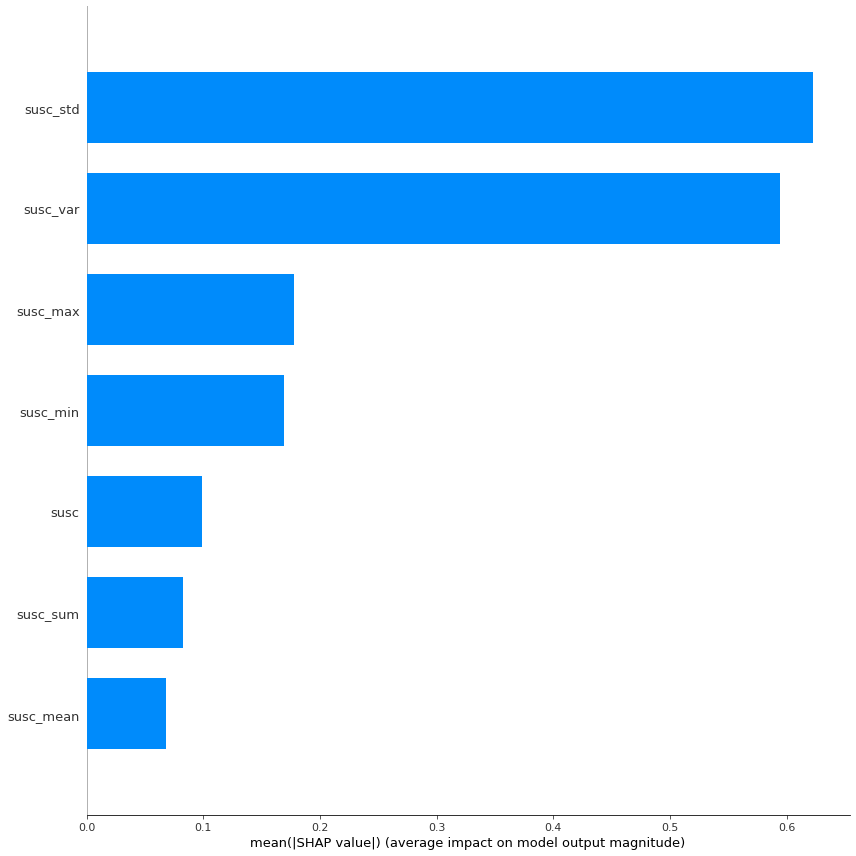

In [83]:
plot_shap_values(CatBoost_bestpipeline_fitted_model, X_test, output_directory=CatBoost_predictions_folder)

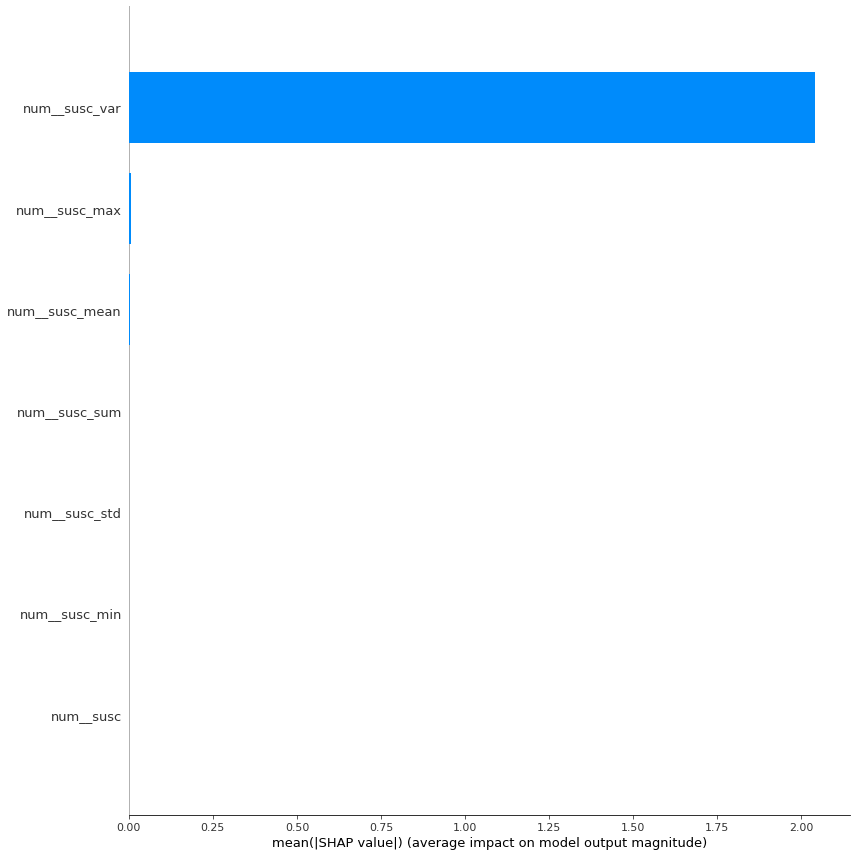

In [85]:
plot_shap_values(LGBM_bestpipeline_fitted_model, X_test,
                 combine_cat_class_importances = False,
                 output_directory=LGBM_predictions_folder)

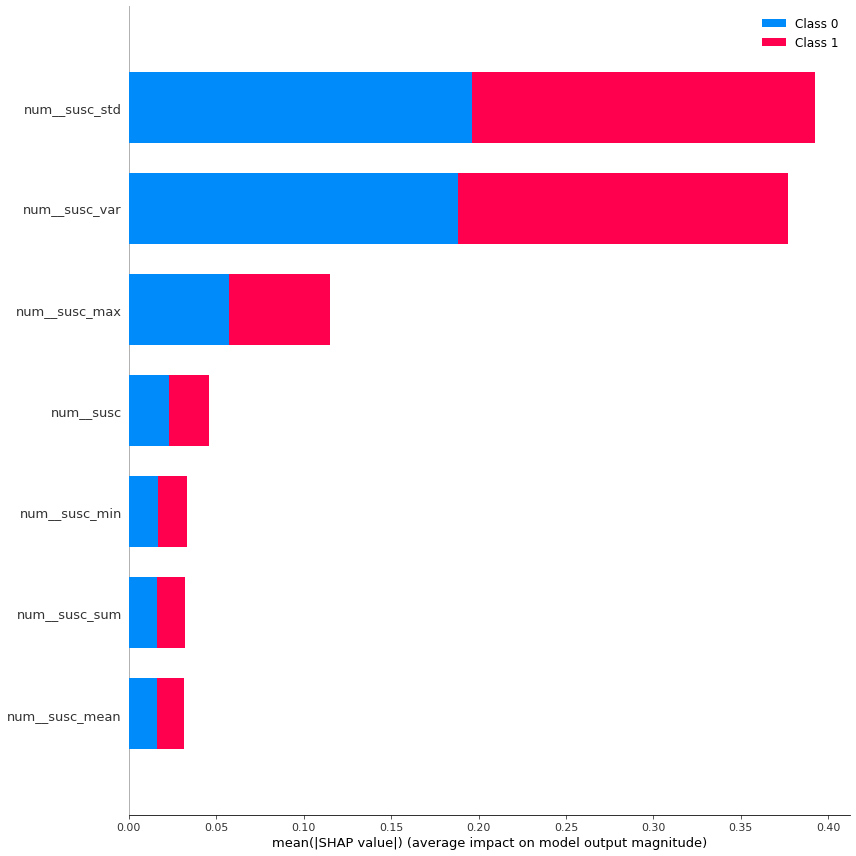

In [86]:
plot_shap_values(RandomForest_bestpipeline_fitted_model, X_test,
                 combine_cat_class_importances = False,
                 output_directory=RF_predictions_folder)